In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# Data set Explanation



•	Retailer: Represents the business or individual that sells Adidas products directly to consumers.

•	Retailer ID: A unique identifier assigned to each retailer in the dataset.

•	Invoice Date: The date when a particular invoice or sales transaction took place.

•	Region: Refers to a specific geographical area or district where the sales activity or retail operations occur.

•	State: Represents a specific administrative division or territory within a country.

•	City: Refers to an urban area or municipality where the sales activity or retail operations are conducted.

•	Product: Represents the classification or grouping of Adidas products.

•	Price per Unit: The cost or price associated with a single unit of a product.

•	Units Sold: The quantity or number of units of a particular product sold during a specific sales transaction.

•	Total Sales: The overall revenue generated from the sales transactions.

•	Operating Profit: The profit earned by the retailer from its normal business operations.

•	Sales Method: The approach or channel used by the retailer to sell its products or services.

In [2]:
np.random.seed(3)
data  =pd.read_csv(r"C:\Users\szeya\Downloads\archive (3)\data_sales (1).csv")
data.sample(5 )

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method
3685,Sports Direct,1197831,5/1/2021,South,Tennessee,Knoxville,Men's Apparel,$39.00,120,468,$201,Outlet
7390,Sports Direct,1197831,8/3/2020,South,Texas,Houston,Women's Athletic Footwear,$40.00,600,"24,000","$10,800",Outlet
3546,West Gear,1185732,12/10/2021,West,Utah,Salt Lake City,Men's Apparel,$27.00,124,335,$137,Outlet
3503,Sports Direct,1185732,9/3/2021,Northeast,Connecticut,Hartford,Men's Street Footwear,$52.00,125,650,$351,Online
1340,Walmart,1197831,9/8/2020,South,Texas,Houston,Women's Athletic Footwear,$37.00,200,740,$370,Outlet


## `note`



from sample find Total Sales incorrect

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9641 entries, 0 to 9640
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9641 non-null   object
 1   Retailer ID       9641 non-null   int64 
 2   Invoice Date      9641 non-null   object
 3   Region            9641 non-null   object
 4   State             9641 non-null   object
 5   City              9641 non-null   object
 6   Product           9641 non-null   object
 7   Price per Unit    9639 non-null   object
 8   Units Sold        9641 non-null   object
 9   Total Sales       9641 non-null   object
 10  Operating Profit  9641 non-null   object
 11  Sales Method      9641 non-null   object
dtypes: int64(1), object(11)
memory usage: 904.0+ KB


# `Discover Data`

# Cleaning and Prepocessing data

# `Invoice Date`

In [4]:
data["Invoice Date"] =pd.to_datetime(data["Invoice Date"])

In [5]:
data["Invoice Date"]

0      2021-06-17
1      2021-07-16
2      2021-08-25
3      2021-08-27
4      2021-08-21
          ...    
9636   2021-11-18
9637   2021-10-22
9638   2021-10-22
9639   2021-04-10
9640   2021-10-05
Name: Invoice Date, Length: 9641, dtype: datetime64[ns]

In [6]:
data["Month"] = data["Invoice Date"].dt.month
data.Month =data.Month.astype("category")

In [7]:
data["Year"] = data["Invoice Date"].dt.year
data.Year =data.Year.astype("category")
data.Year

0       2021
1       2021
2       2021
3       2021
4       2021
        ... 
9636    2021
9637    2021
9638    2021
9639    2021
9640    2021
Name: Year, Length: 9641, dtype: category
Categories (2, int64): [2020, 2021]

In [8]:
data.isna().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      2
Units Sold          0
Total Sales         0
Operating Profit    0
Sales Method        0
Month               0
Year                0
dtype: int64

# `Price per Unit`

In [9]:
data["Price per Unit"]

0       $103.00 
1       $103.00 
2        $10.00 
3        $15.00 
4        $15.00 
          ...   
9636     $65.00 
9637     $65.00 
9638     $75.00 
9639     $65.00 
9640     $65.00 
Name: Price per Unit, Length: 9641, dtype: object

In [10]:
data[data["Price per Unit"].isna()]

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method,Month,Year
6725,Foot Locker,1185732,2020-01-29,Northeast,New York,New York,Men's Apparel,NaN,850,"51,000","$15,300",Outlet,1,2020
7882,Sports Direct,1197831,2020-07-29,South,Texas,Houston,Men's Apparel,NaN,500,"20,000","$6,000",Outlet,7,2020


In [11]:
data[(data["Product"] =="Men's Apparel" )& (data["Retailer"] == "Foot Locker")]

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method,Month,Year
145,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,$43.00,306,"1,316",$487,Outlet,1,2020
146,Foot Locker,1185732,2020-01-23,Northeast,New York,New York,Men's Apparel,$43.00,306,"1,316",$461,Outlet,1,2020
218,Foot Locker,1185732,2020-01-29,Northeast,New York,New York,Men's Apparel,$43.00,289,"1,243",$398,Outlet,1,2020
229,Foot Locker,1185732,2020-03-08,Northeast,New York,New York,Men's Apparel,$45.00,288,"1,296",$441,Outlet,3,2020
246,Foot Locker,1185732,2020-02-04,Northeast,New York,New York,Men's Apparel,$44.00,281,"1,236",$445,Outlet,2,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9622,Foot Locker,1185732,2021-12-20,Northeast,Maryland,Baltimore,Men's Apparel,$60.00,175,"10,500","$3,150",In-store,12,2021
9624,Foot Locker,1185732,2021-10-15,Northeast,Delaware,Wilmington,Men's Apparel,$65.00,175,"11,375","$3,413",In-store,10,2021
9633,Foot Locker,1185732,2021-10-19,Northeast,New Hampshire,Manchester,Men's Apparel,$75.00,175,"13,125","$3,938",Outlet,10,2021
9634,Foot Locker,1185732,2021-11-25,Northeast,Pennsylvania,Philadelphia,Men's Apparel,$65.00,150,"9,750","$3,413",Outlet,11,2021


In [12]:
data["Price per Unit"]=data["Price per Unit"].str.strip("$")
data["Price per Unit"]=data["Price per Unit"].str.strip(" ")
data["Price per Unit"]=data["Price per Unit"].str.strip(".00")


In [13]:
price1 = 51000/850
price2=20000/500

In [14]:
data.loc[6725,'Price per Unit'] =price1

In [15]:
data.loc[7882,'Price per Unit'] =price2


In [16]:
data["Price per Unit"]=data["Price per Unit"].astype("int")

In [17]:
data.isna().mean()

Retailer            0.0
Retailer ID         0.0
Invoice Date        0.0
Region              0.0
State               0.0
City                0.0
Product             0.0
Price per Unit      0.0
Units Sold          0.0
Total Sales         0.0
Operating Profit    0.0
Sales Method        0.0
Month               0.0
Year                0.0
dtype: float64

In [18]:
data.sample(5)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method,Month,Year
2281,Foot Locker,1185732,2021-12-03,Northeast,Pennsylvania,Philadelphia,Men's Street Footwear,6,158,948,$626,Online,12,2021
3408,Foot Locker,1185732,2021-06-15,Midwest,Nebraska,Omaha,Men's Athletic Footwear,4,125,"5,000","$1,750",Outlet,6,2021
3150,Kohl's,1189833,2021-03-03,Midwest,Montana,Billings,Women's Apparel,56,133,745,$283,Online,3,2021
8521,Kohl's,1185732,2021-03-10,West,Wyoming,Cheyenne,Women's Athletic Footwear,35,400,"14,000","$4,900",In-store,3,2021
1737,Kohl's,1189833,2021-05-10,West,California,Los Angeles,Women's Athletic Footwear,46,176,810,$405,Online,5,2021


In [19]:
data.duplicated().sum()

0

# 'Retailer'


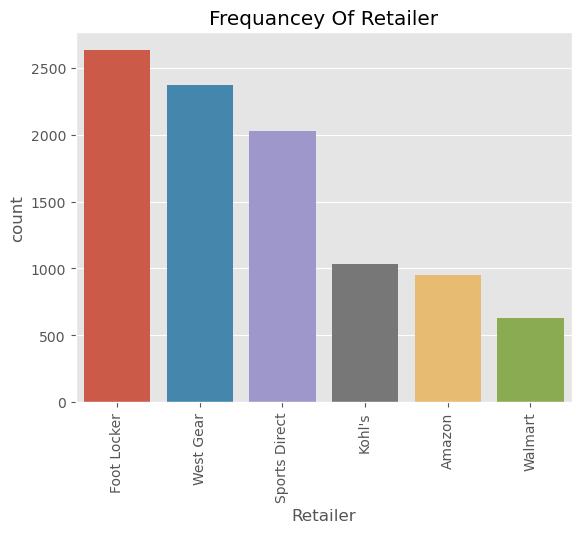

In [20]:
plt.style.use("ggplot")
sns.countplot(data =data ,x= data.Retailer , order=data.Retailer.value_counts().index)
plt.xticks(rotation = 90)
plt.title("Frequancey Of Retailer")
plt.show()

In [21]:
data.Retailer.value_counts()

Foot Locker      2634
West Gear        2372
Sports Direct    2030
Kohl's           1030
Amazon            949
Walmart           626
Name: Retailer, dtype: int64

`foot locker` is the most frequact

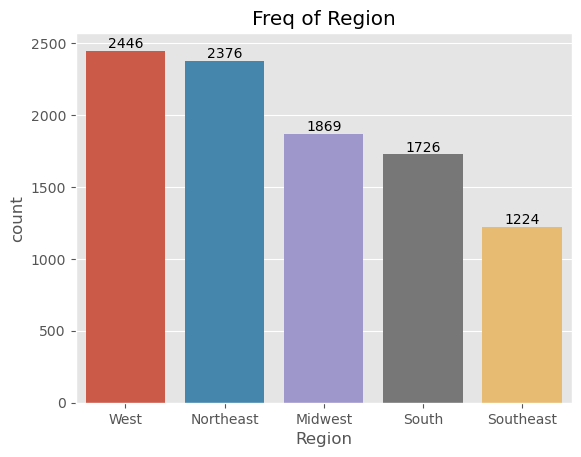

In [22]:
plt.title("Freq of Region")
figer= sns.countplot(x= "Region" ,data= data, order = data.Region.value_counts().index)
for cotain in figer.containers :
    figer.bar_label(cotain)
plt.show()

In [23]:
 data.Region.value_counts()

West         2446
Northeast    2376
Midwest      1869
South        1726
Southeast    1224
Name: Region, dtype: int64

`West` is the most frequancy

# `Product`

In [24]:
data.Product.value_counts()

Men's Street Footwear        1610
Men's Athletic Footwear      1608
Women's Apparel              1607
Women's Street Footwear      1606
Women's Athletic Footwear    1605
Men's Apparel                1604
Men's aparel                    1
Name: Product, dtype: int64

In [25]:
data.Product.unique()

array(["Women's Apparel", "Men's Street Footwear",
       "Women's Street Footwear", "Men's Athletic Footwear",
       "Women's Athletic Footwear", "Men's Apparel", "Men's aparel"],
      dtype=object)

In [26]:
data.loc[data.Product == "Men's aparel" ,"Product"]  ="Men's Apparel"  

In [27]:
data.Product.value_counts()
data.Product = data.Product.astype("category")

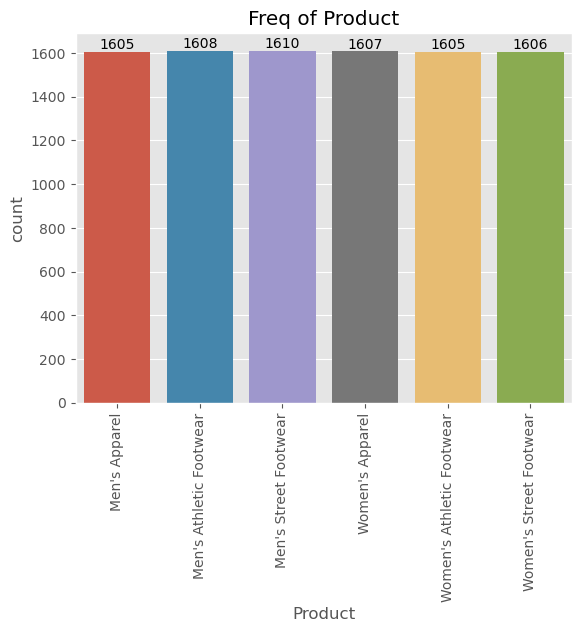

In [28]:
plt.title("Freq of Product")
figer = sns.countplot(data= data , x="Product") 
for cotain in figer.containers :
    figer.bar_label(cotain)
plt.xticks(rotation= 90)
plt.show()

# note

The demand for the products is equal between women and men

# `Units Sold`

In [29]:
data["Units Sold"] = data["Units Sold"].str.replace("," ,"")

In [30]:
data["Units Sold"] =data["Units Sold"].astype("int")
data["Units Sold"]

0       218
1       163
2       700
3       575
4       475
       ... 
9636    150
9637    150
9638    150
9639    150
9640    150
Name: Units Sold, Length: 9641, dtype: int32

# `Total Sales`	

In [31]:
data.sample()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method,Month,Year
9548,Amazon,1185732,2021-09-20,West,Alaska,Anchorage,Men's Apparel,65,200,"13,000","$3,250",Outlet,9,2021


In [32]:
data["Total Sales"] = data["Total Sales"].str.replace("," ,"")
data["Total Sales"] =data["Total Sales"].astype("float")

In [33]:
data["TOTal SAles"] = data["Price per Unit"] * data["Units Sold"]
data["TOTal SAles"]  =data["TOTal SAles"].astype("float")

In [34]:
data [data["TOTal SAles"] != data["Total Sales"] ]

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method,Month,Year,TOTal SAles
0,Walmart,1128299,2021-06-17,Southeast,Florida,Orlando,Women's Apparel,103,218,2245.0,"$1,257",Online,6,2021,22454.0
1,West Gear,1128299,2021-07-16,South,Louisiana,New Orleans,Women's Apparel,103,163,1679.0,$806,Online,7,2021,16789.0
2,Sports Direct,1197831,2021-08-25,South,Alabama,Birmingham,Men's Street Footwear,1,700,7000.0,"$3,150",Outlet,8,2021,700.0
6,Sports Direct,1185732,2021-11-17,South,Mississippi,Jackson,Men's Athletic Footwear,2,450,9000.0,"$3,150",Online,11,2021,900.0
8,West Gear,1185732,2021-04-03,Midwest,Wisconsin,Milwaukee,Men's Street Footwear,2,450,9000.0,"$2,700",In-store,4,2021,900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9627,Sports Direct,1185732,2021-11-07,Northeast,Rhode Island,Providence,Men's Apparel,6,175,10500.0,"$3,150",In-store,11,2021,1050.0
9629,Amazon,1185732,2021-10-12,Northeast,Vermont,Burlington,Women's Athletic Footwear,6,175,10500.0,"$3,675",In-store,10,2021,1050.0
9630,Amazon,1185732,2021-10-12,Northeast,Vermont,Burlington,Men's Apparel,7,175,12250.0,"$4,288",In-store,10,2021,1225.0
9631,Amazon,1185732,2021-04-18,Northeast,New Hampshire,Manchester,Men's Apparel,6,175,10500.0,"$3,150",In-store,4,2021,1050.0


Total sales incorrect

In [35]:
data["Total Sales"] =data["TOTal SAles"]

In [36]:
data.drop(["TOTal SAles"],axis=1,  inplace=True)

In [37]:
data["Total Sales"]

0       22454.0
1       16789.0
2         700.0
3        8625.0
4        7125.0
         ...   
9636     9750.0
9637     9750.0
9638    11250.0
9639     9750.0
9640     9750.0
Name: Total Sales, Length: 9641, dtype: float64

In [38]:
data["Price per Unit"] =data["Price per Unit"].astype("category")

In [39]:
data.drop(["Retailer ID"] ,axis=1 ,inplace=True)

In [40]:
data.sample(5)


,Retailer,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method,Month,Year
1540,Walmart,2020-09-13,South,Texas,Houston,Women's Street Footwear,48,188,9024.0,$424,Online,9,2020
7858,Sports Direct,2021-08-09,Midwest,North Dakota,Fargo,Men's Street Footwear,5,525,2625.0,"$9,188",In-store,8,2021
3179,West Gear,2020-03-06,West,Nevada,Las Vegas,Women's Athletic Footwear,43,132,5676.0,$199,Outlet,3,2020
8126,Sports Direct,2021-07-12,Southeast,Georgia,Atlanta,Men's Apparel,55,475,26125.0,"$9,144",Online,7,2021
5570,Foot Locker,2021-09-06,Northeast,Rhode Island,Providence,Women's Apparel,41,64,2624.0,$118,Outlet,9,2021


In [41]:
data["Operating Profit"]=data["Operating Profit"].str.strip("$")
data["Operating Profit"]=data["Operating Profit"].str.replace(",", "")
data.loc[data["Operating Profit"]=="","Operating Profit"] ="0"
data["Operating Profit"] =data["Operating Profit"].astype("float")

In [42]:
data["Gender"] = data["Product"].str.contains("Men")

In [43]:
data.Gender = data.Gender.map({True :"Male" ,False :"Female"})

In [44]:
data["Units Sold"].max()


1275

In [45]:
len(data[data["Units Sold"]==0])


4

In [46]:
data =data[data["Units Sold"]!=0]

In [47]:
data

,Retailer,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method,Month,Year,Gender
0,Walmart,2021-06-17,Southeast,Florida,Orlando,Women's Apparel,103,218,22454.0,1257.0,Online,6,2021,Female
1,West Gear,2021-07-16,South,Louisiana,New Orleans,Women's Apparel,103,163,16789.0,806.0,Online,7,2021,Female
2,Sports Direct,2021-08-25,South,Alabama,Birmingham,Men's Street Footwear,1,700,700.0,3150.0,Outlet,8,2021,Male
3,Sports Direct,2021-08-27,South,Alabama,Birmingham,Women's Street Footwear,15,575,8625.0,3881.0,Outlet,8,2021,Female
4,Sports Direct,2021-08-21,South,Alabama,Birmingham,Women's Street Footwear,15,475,7125.0,3206.0,Outlet,8,2021,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9636,Amazon,2021-11-18,Northeast,Maine,Portland,Men's Apparel,65,150,9750.0,2438.0,Outlet,11,2021,Male
9637,Amazon,2021-10-22,West,Alaska,Anchorage,Women's Athletic Footwear,65,150,9750.0,2438.0,Outlet,10,2021,Female
9638,Amazon,2021-10-22,West,Alaska,Anchorage,Men's Apparel,75,150,11250.0,2813.0,Outlet,10,2021,Male
9639,West Gear,2021-04-10,Midwest,Indiana,Indianapolis,Men's Apparel,65,150,9750.0,2925.0,In-store,4,2021,Male


In [48]:
data["Units Sold"].unique()

array([ 218,  163,  700,  575,  475,  450,  434,  425,  420,  408,  403,
        400,  390,  388,  384,  376,  375,  374,  372,  366,  360,  359,
        355,  354,  352,  350,  349,  347,  345,  341,  340,  338,  336,
        333,  332,  330,  326,  325,  324,  323,  322,  320,  319,  318,
        317,  315,  314,  313,  312,  311,  310,  308,  306,  305,  304,
        302,  300,  299,  298,  297,  296,  295,  294,  293,  290,  289,
        288,  287,  286,  285,  284,  283,  282,  281,  280,  279,  278,
        277,  276,  275,  273,  272,  271,  270,  268,  267,  265,  264,
        263,  261,  260,  259,  258,  257,  256,  255,  254,  252,  250,
        248,  247,  246,  245,  244,  243,  241,  240,  239,  238,  236,
        234,  233,  232,  231,  230,  228,  225,  224,  223,  221,  220,
        219,  217,  216,  215,  213,  210,  209,  208,  207,  206,  204,
        203,  202,  201,  200,  198,  196,  195,  194,  193,  192,  191,
        190,  189,  188,  187,  186,  185,  184,  1

In [49]:
data["Unit_catogry"]=pd.qcut(data["Units Sold"],7, ["1-50" ,"50-150" ,"150-250" ,"250-500" , "500-750" , "750-1000" ,"1000+" ])

<Axes: xlabel='Unit_catogry', ylabel='count'>

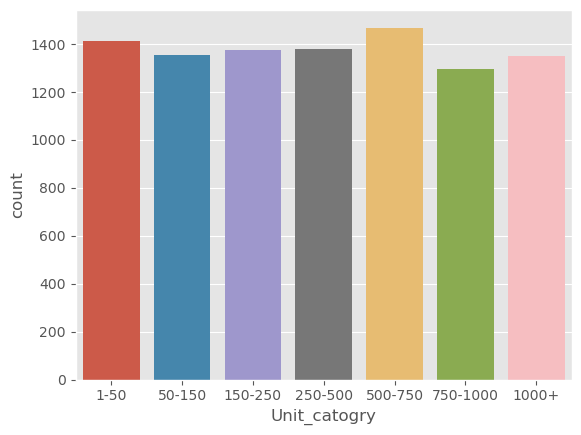

In [50]:
sns.countplot(x=data.Unit_catogry)

# End of cleaning

After completing the process of processing, cleaning, and discovering the data and knowing the type of data, I first noticed errors in mathematical operations and errors in data types and distribution.



-Invoice Date	>> error in data Type

-Product >> incoret in value

-Price per Unit >> incoret in dataType


-Total Sales  >> incoret in format , mathmatical operation and data Type

-Operating Profit >>incoret in format and data Type

drop>> id


-GEt gender 

# EDA

In [51]:
data.sample(5)

,Retailer,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method,Month,Year,Gender,Unit_catogry
5064,Foot Locker,2021-04-14,Northeast,Delaware,Wilmington,Women's Apparel,38,78,2964.0,160.0,Online,4,2021,Female,50-150
2630,West Gear,2021-12-19,South,Arkansas,Little Rock,Women's Apparel,7,150,1050.0,536.0,Online,12,2021,Female,150-250
3609,Sports Direct,2021-10-04,West,Idaho,Boise,Men's Apparel,25,123,3075.0,120.0,Outlet,10,2021,Male,150-250
5746,Amazon,2021-11-13,Northeast,Maine,Portland,Women's Street Footwear,42,58,2436.0,124.0,Online,11,2021,Female,1-50
1342,Sports Direct,2021-10-01,South,Alabama,Birmingham,Men's Athletic Footwear,14,200,2800.0,146.0,Outlet,10,2021,Male,250-500


In [52]:
data.describe().round(2)

,Units Sold,Total Sales,Operating Profit
count,9637.00,9637.00,9637.00
mean,256.89,8186.63,3440.71
std,214.10,10242.72,5418.21
min,6.00,16.00,8.00
25%,106.00,2204.00,192.00
50%,176.00,4687.00,437.00
75%,350.00,9625.00,5200.00
max,1275.00,80750.00,39000.00


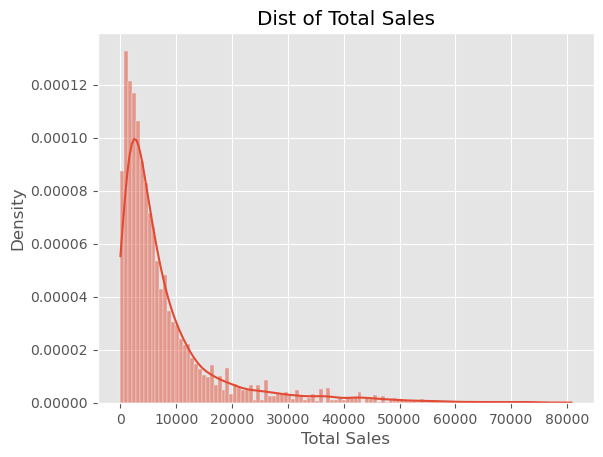

In [53]:
sns.histplot(data["Total Sales"] ,kde=True ,stat="density")
plt.title("Dist of Total Sales")
plt.show()

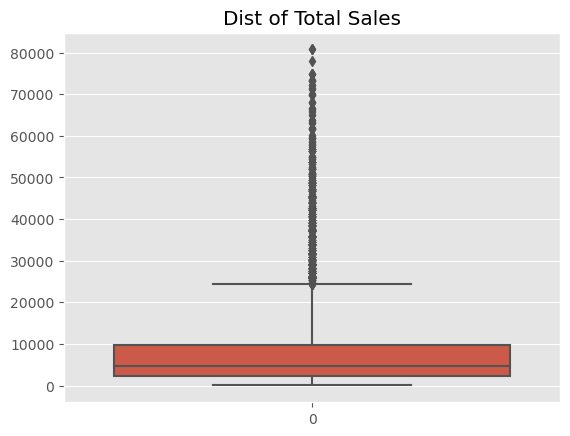

In [54]:
sns.boxplot(data["Total Sales"], whis =2)
plt.title("Dist of Total Sales")
plt.show()

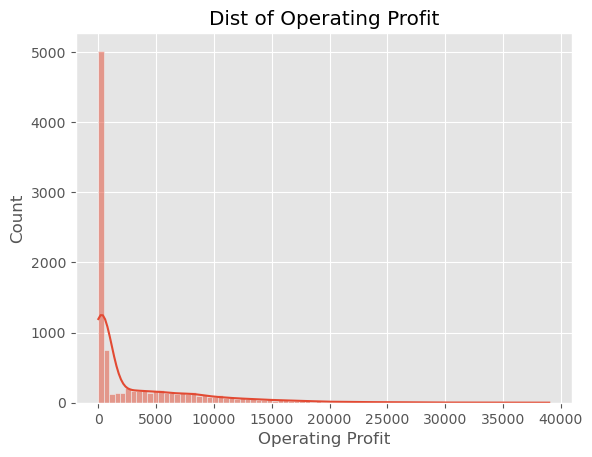

In [55]:
sns.histplot(data["Operating Profit"] ,kde=True )
plt.title("Dist of Operating Profit")
plt.show()

from graph you can find 

About 5,000 sales were made without profit and the mean of profit 5000 




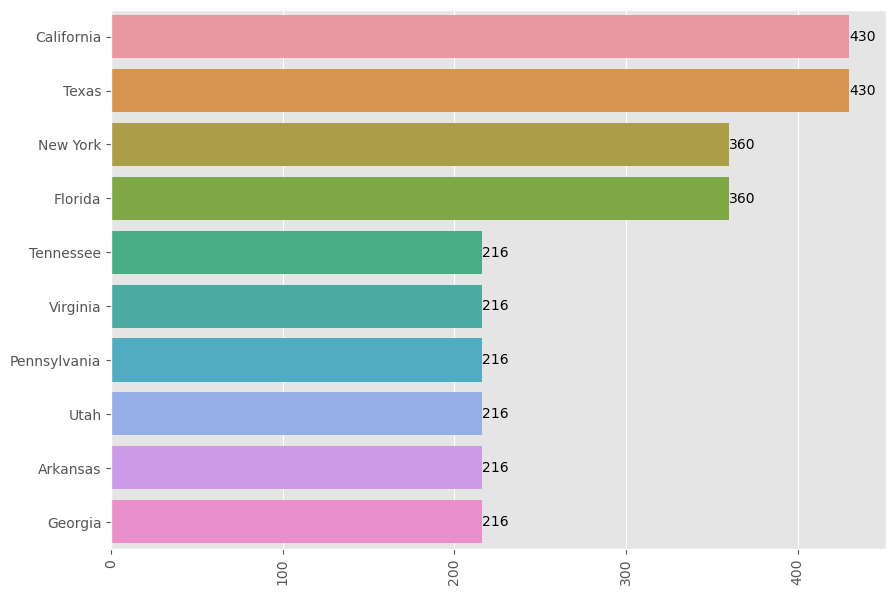

In [56]:
plt.figure(figsize=(10,7))
figer = sns.barplot(y= data["State"].value_counts().sort_values(ascending=False)[:10] .index , 
           x = data["State"].value_counts().sort_values(ascending=False)[:10] .values )
for contain in figer.containers :
    figer.bar_label(contain)
plt.xticks(rotation = 90)
plt.show()

# The frequancy of top 10 `state`
1-California    
2-Texas       
3-New York    
4-Florida     
5-Tennessee   
6-Virginia    
7-Pennsylvania
8-Utah        
9-Arkansas    
10-Georgia     

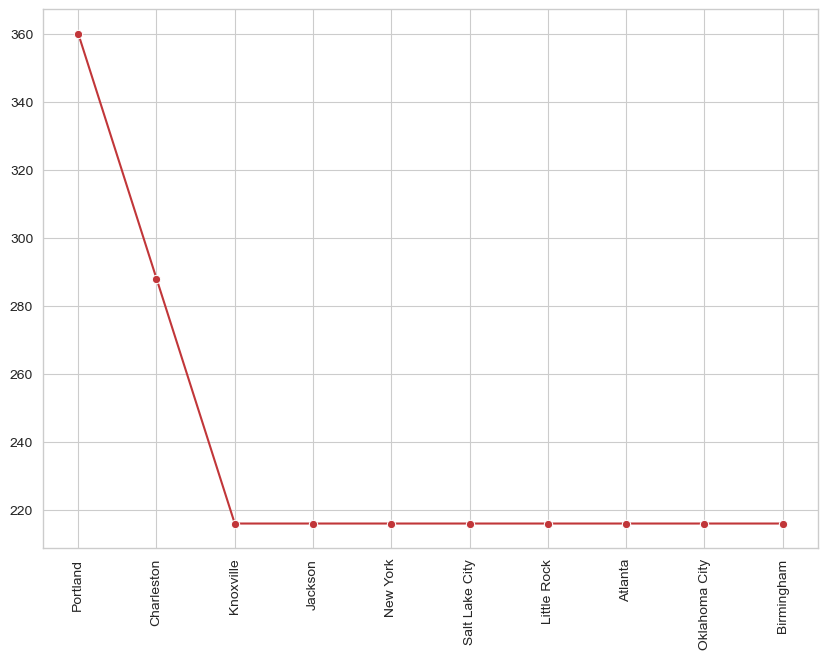

In [57]:
sns.set_style("whitegrid")
sns.set_palette("RdBu")
plt.figure(figsize=(10,7))
figer = sns.lineplot(x= data["City"].value_counts().sort_values(ascending=False)[:10] .index , 
            y = data["City"].value_counts().sort_values(ascending=False)[:10] .values  ,marker = "o")
for contain in figer.containers :
    figer.bar_label(contain)
plt.xticks(rotation = 90)
plt.show()

# The frequancy of top 10 `city`
1-Portland        
2-Charleston      
3-Los Angeles     
4-Philadelphia    
5-Birmingham      
6-Little Rock     
7-Atlanta         
8-Oklahoma City   
9-Jackson         
10-Salt Lake City  

# Total Sales Of `Men` is smaller than Total Sales Of `Women` ?

In [58]:

data.groupby("Gender").agg( {"Total Sales" :"sum"})/data["Total Sales"].sum()

,Total Sales
Gender,
Female,0.455925
Male,0.544075


<Axes: xlabel='Gender', ylabel='Total Sales'>

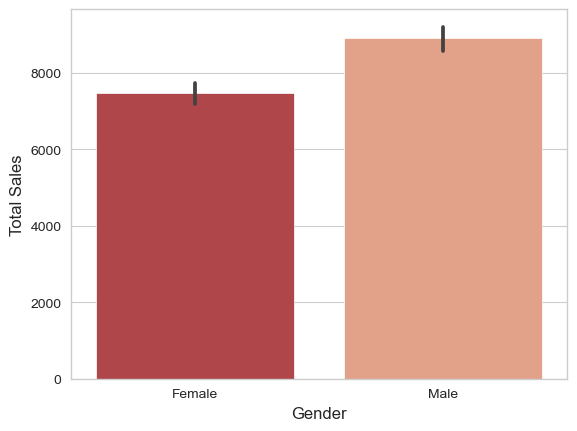

In [59]:
sns.barplot(data= data ,x="Gender" , y="Total Sales")

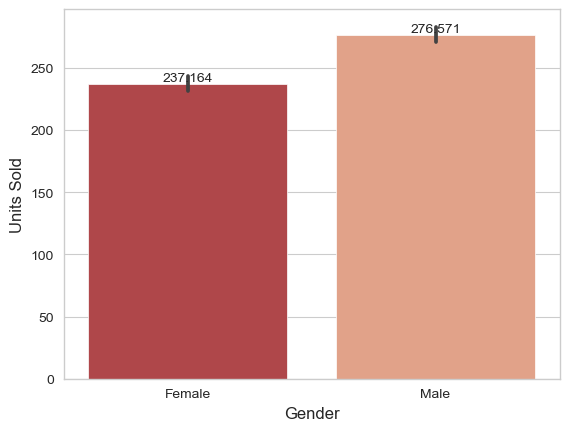

In [60]:
figer= sns.barplot(data= data ,x="Gender" , y="Units Sold")
for contain in figer.containers :
    figer.bar_label(contain)

## from Graph
Although the number of customers between `men` and `women` is equal, men's sales are more expensive than women's.

# Most popular products for each retailer?

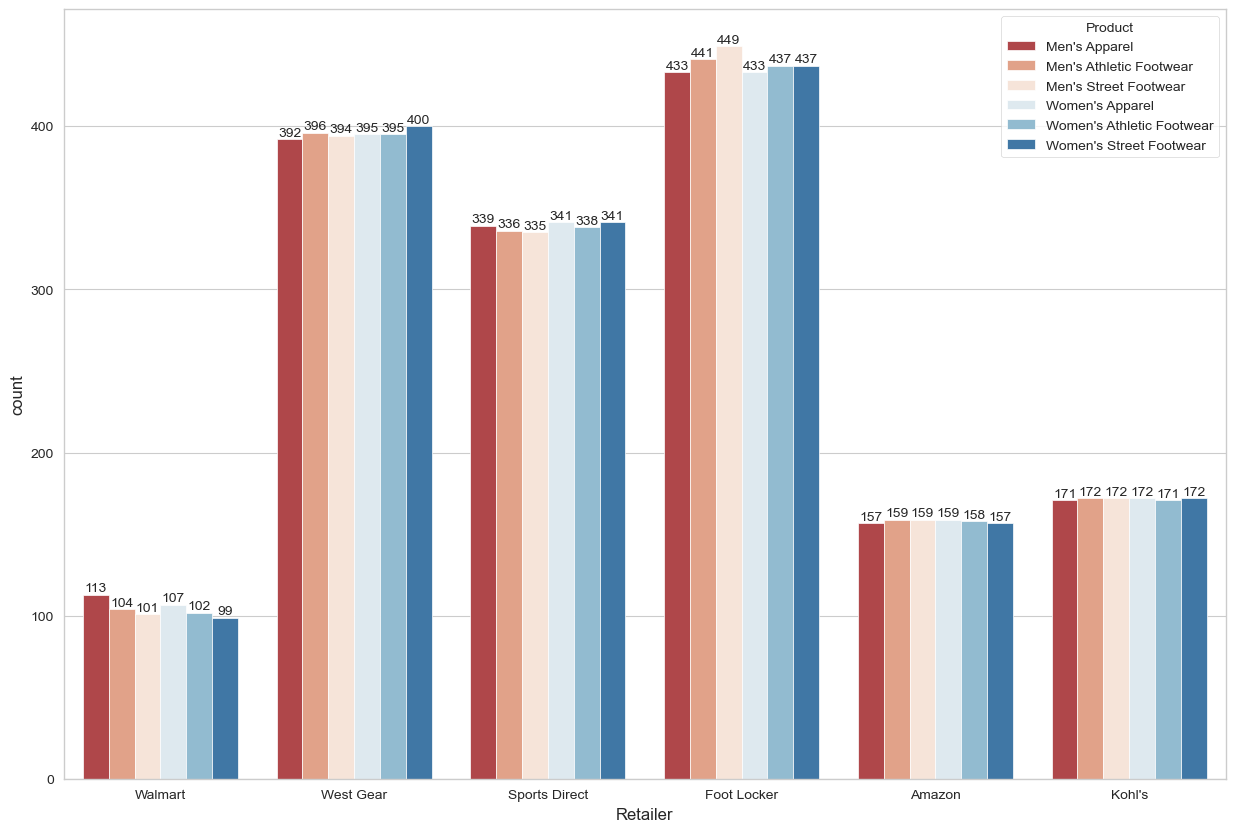

In [61]:
plt.figure(figsize=(15,10))
figer =sns.countplot(data=data , x="Retailer" , hue="Product")
for contain in figer.containers :
    figer.bar_label(contain)

# from graph


Foot Locker has the most stores for men’s and women’s street footwear.


most :

    1-Men's Street FootWear
    2-Men's Atheetic


Walmart has the fewest stores for all product categories except women’s apparel.


most :

    1-Men's Apperal
    2-Women's Apperal




# Most popular products for top 5 City   and each Regoin?

In [62]:
top_5city =["Portland","Charleston","Los Angeles","Philadelphia","Birmingham" ]
data_of_top_5City =data[data.City.isin(top_5city)].copy()
data_of_top_5City.sample(5)

,Retailer,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method,Month,Year,Gender,Unit_catogry
1423,West Gear,2021-11-24,West,Oregon,Portland,Men's Athletic Footwear,48,195,9360.0,468.0,Online,11,2021,Male,250-500
6656,Sports Direct,2021-01-06,Southeast,South Carolina,Charleston,Men's Street Footwear,35,925,32375.0,12950.0,Online,1,2021,Male,1000+
8065,Sports Direct,2021-09-26,South,Alabama,Birmingham,Women's Street Footwear,35,475,16625.0,8313.0,Outlet,9,2021,Female,750-1000
9440,Foot Locker,2021-12-05,Northeast,Pennsylvania,Philadelphia,Women's Street Footwear,55,225,12375.0,4950.0,Outlet,12,2021,Female,500-750
4389,West Gear,2021-01-17,West,Oregon,Portland,Men's Street Footwear,33,100,3300.0,168.0,Online,1,2021,Male,50-150


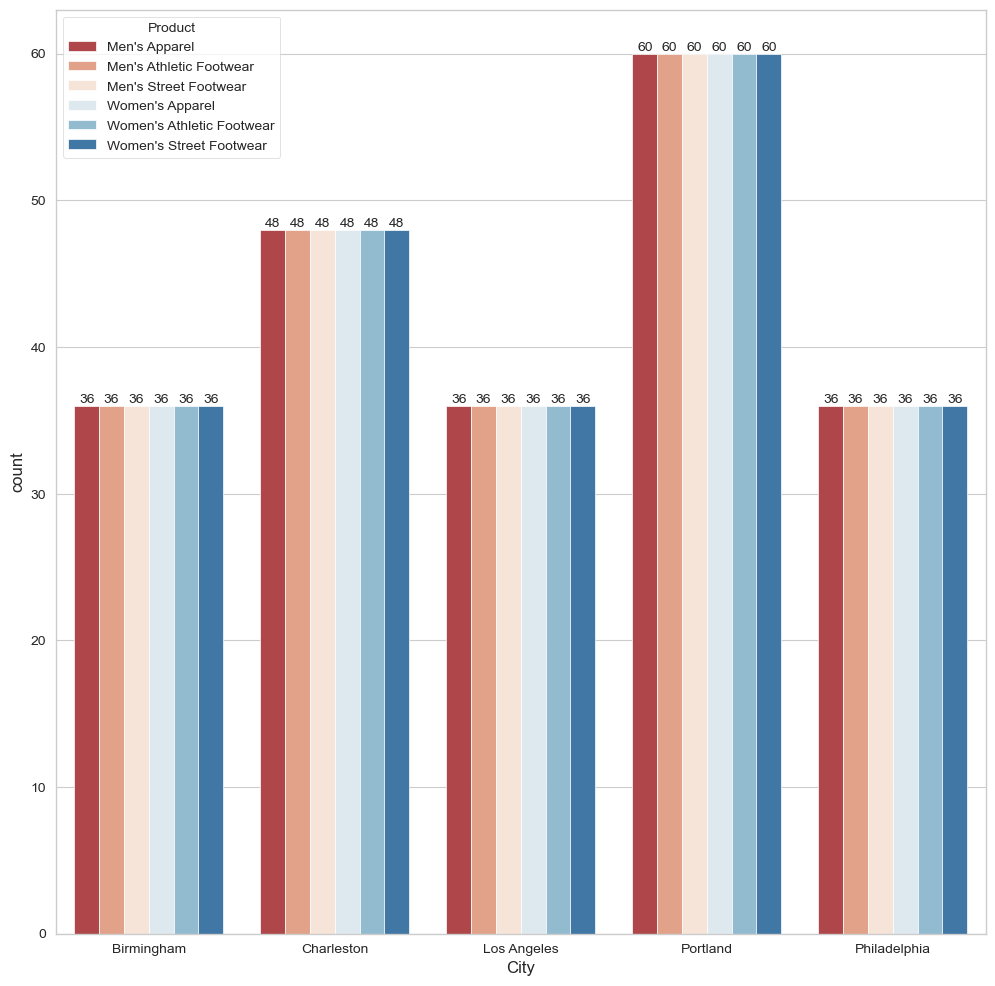

In [63]:

plt.figure(figsize=(12,12))

figer =sns.countplot(data=data_of_top_5City , x="City" , hue="Product"  )
for contain in figer.containers :
    figer.bar_label(contain)

    

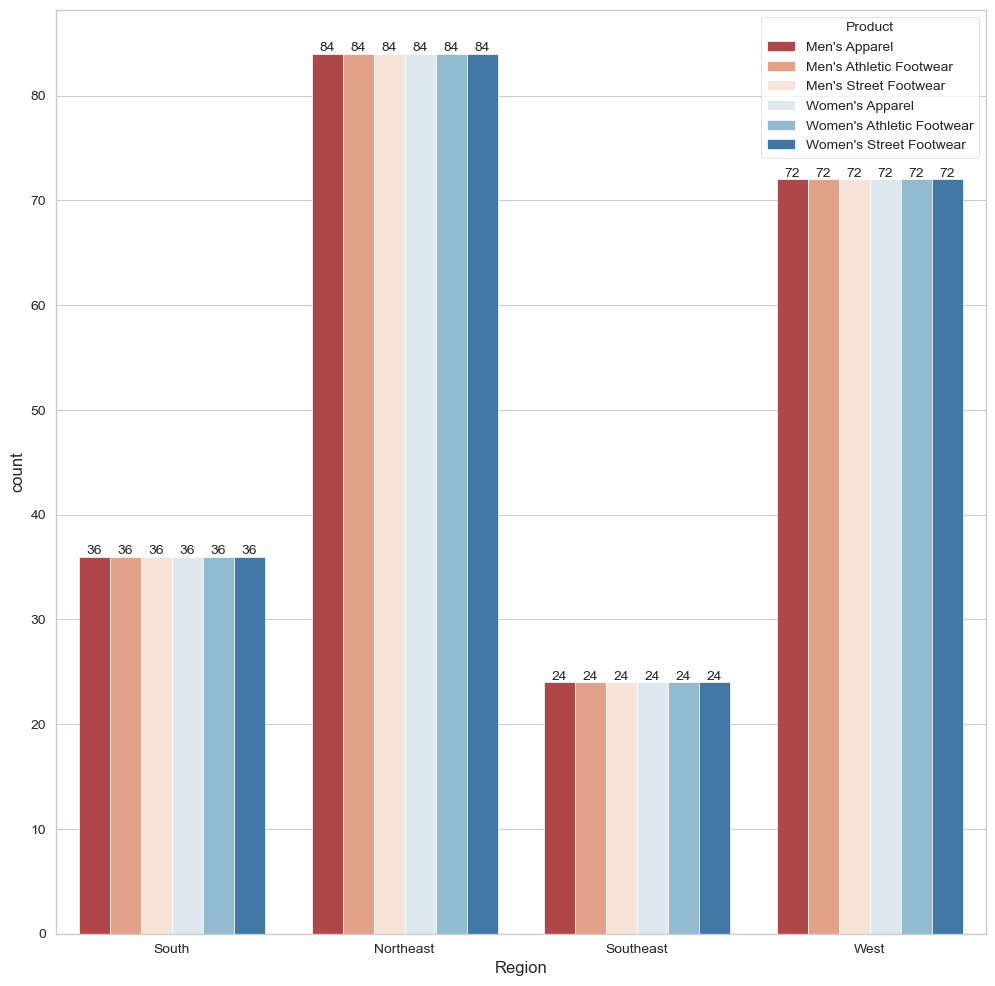

In [64]:
plt.figure(figsize=(12,12))

figer =sns.countplot(data=data_of_top_5City , x="Region" , hue="Product" )
for contain in figer.containers :
    figer.bar_label(contain)
plt.show()

every `region` and every `city`, the number of products of each type of product is equal. No product is distinguished from another in quantity or number.



# The  Most `Sales Method` is ......... .

In [65]:
data["Sales Method"].value_counts()

Online      4887
Outlet      3010
In-store    1740
Name: Sales Method, dtype: int64

The  Most `Sales Method` is Online 


# For each  `Sales Method` , what is the most freq of `Retailer`?

<Axes: xlabel='Sales Method', ylabel='count'>

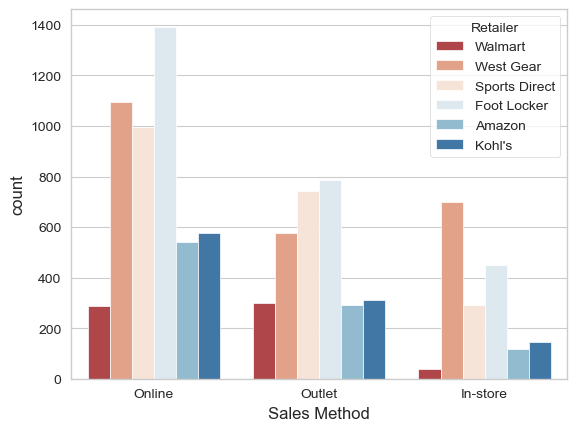

In [66]:
sns.countplot(data= data ,x="Sales Method" ,hue="Retailer" )

The Retailer with the highest online sales is Foot Locker 

andthe Retailer with the highest in-store sales is West Gear

# What is the most `Product` and What is The Present  `Total Sales` and `Profits`  ?

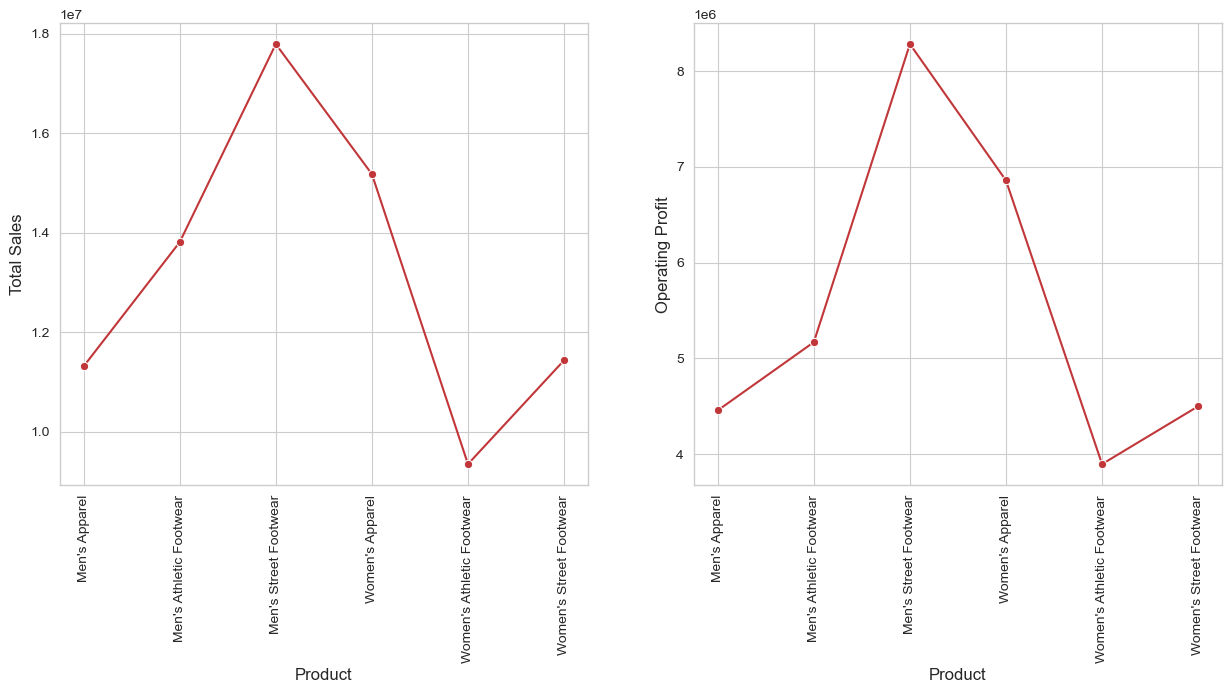

In [67]:
sns.set_style("whitegrid")
sns.set_palette("RdBu")
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
Tot =data.groupby("Product")['Total Sales'].sum().reset_index().sort_values(by = 'Total Sales', ascending = False)
sns.lineplot(data= Tot , x="Product" ,y="Total Sales" ,marker="o" )
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
Prof =data.groupby("Product")['Operating Profit'].sum().reset_index().\
sort_values(by = 'Operating Profit', ascending = False)
sns.lineplot(data= Prof , x="Product" ,y="Operating Profit" ,marker="o" )
plt.xticks(rotation = 90)
plt.show()

In [68]:
tabel =data.groupby("Product")[['Total Sales' ,"Operating Profit" ]].sum().reset_index()
tabel["Precentage"] =((tabel['Total Sales'] / tabel['Total Sales'].sum()) * 100).round()
tabel

,Product,Total Sales,Operating Profit,Precentage
0,Men's Apparel,11317883.0,4456719.0,14.0
1,Men's Athletic Footwear,13813788.0,5168997.0,18.0
2,Men's Street Footwear,17792901.0,8280294.0,23.0
3,Women's Apparel,15180511.0,6856750.0,19.0
4,Women's Athletic Footwear,9352026.0,3896040.0,12.0
5,Women's Street Footwear,11437489.0,4499284.0,14.0


The Top Product have Total Sales and Profit is `Mens Street Footwear` with 23%

# What is the most `Retailer` and What is The  Present  `Total Sales` and `Profits`  ?

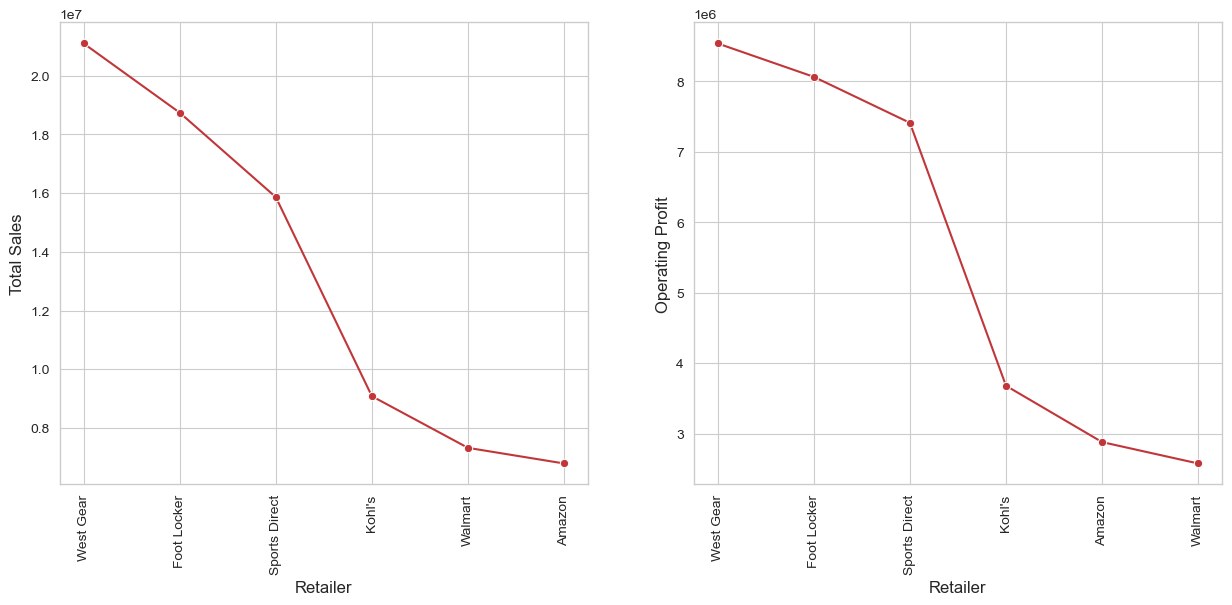

In [69]:

plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
Tot =data.groupby("Retailer")['Total Sales'].sum().reset_index().sort_values(by = 'Total Sales', ascending = False)
sns.lineplot(data= Tot , x="Retailer" ,y="Total Sales" ,marker="o" )
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
Prof =data.groupby("Retailer")['Operating Profit'].sum().reset_index().\
sort_values(by = 'Operating Profit', ascending = False)
sns.lineplot(data= Prof , x="Retailer" ,y="Operating Profit" ,marker="o" )
plt.xticks(rotation = 90)
plt.show()

In [70]:
tabel =data.groupby("Retailer")[['Total Sales' ,"Operating Profit" ]].sum().reset_index()
tabel["Precentage"] =((tabel['Total Sales'] / tabel['Total Sales'].sum()) * 100).round()
tabel

,Retailer,Total Sales,Operating Profit,Precentage
0,Amazon,6787813.0,2881885.0,9.0
1,Foot Locker,18741867.0,8065150.0,24.0
2,Kohl's,9080016.0,3681153.0,12.0
3,Sports Direct,15863952.0,7412864.0,20.0
4,Walmart,7320355.0,2578226.0,9.0
5,West Gear,21100595.0,8538806.0,27.0


The Top `Retailer` have Total Sales and Profit is `West Gear` with 27%

# What is the most `Sales Method` and What is The  Present  `Total Sales` and `Profits`  ?

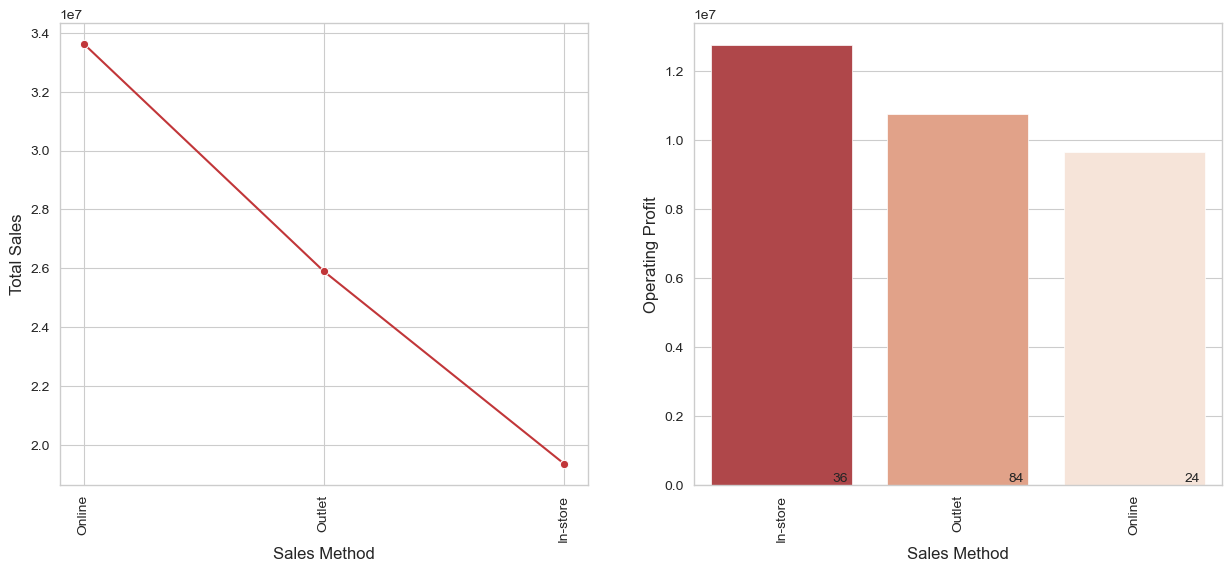

In [71]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
Tot =data.groupby("Sales Method")['Total Sales'].sum().reset_index().sort_values(by = 'Total Sales', ascending = False)
sns.lineplot(data= Tot , x="Sales Method" ,y="Total Sales" ,marker="o" )
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
Prof =data.groupby("Sales Method")['Operating Profit'].sum().reset_index().\
sort_values(by = 'Operating Profit', ascending = False)
figer= sns.barplot(data= Prof , x="Sales Method" ,y="Operating Profit" )
for cotain in figer.containers :
    figer.bar_label(contain)
plt.xticks(rotation = 90)
plt.show()

In [72]:
tabel =data.groupby("Sales Method")[['Total Sales' ,"Operating Profit" ]].sum().reset_index()
tabel["Precentage"] =((tabel['Total Sales'] / tabel['Total Sales'].sum()) * 100).round()
tabel

,Sales Method,Total Sales,Operating Profit,Precentage
0,In-store,19369515.0,12759274.0,25.0
1,Online,33624847.0,9655634.0,43.0
2,Outlet,25900236.0,10743176.0,33.0


The Top `sales Method` have Total Sales and Profit `Online` with 43%

# What is the most `Region` and What is The  Present  `Total Sales` and `Profits`  ?

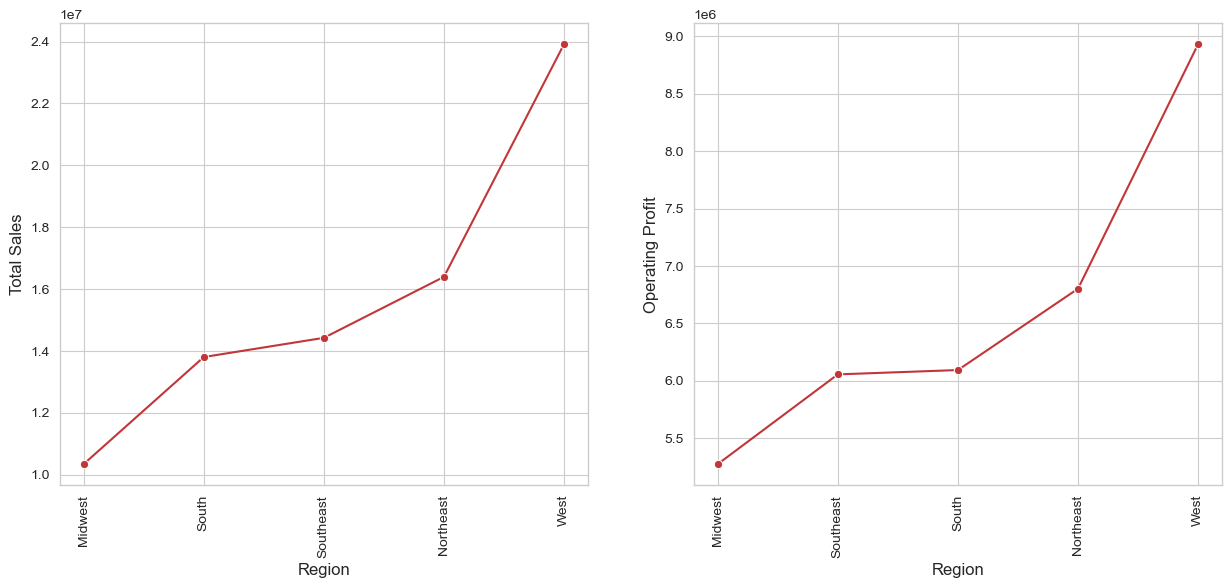

In [73]:

plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
Tot =data.groupby("Region")['Total Sales'].sum().reset_index().sort_values(by = 'Total Sales')
sns.lineplot(data= Tot , x="Region" ,y="Total Sales" ,marker="o" )
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
Prof =data.groupby("Region")['Operating Profit'].sum().reset_index().\
sort_values(by = 'Operating Profit')
sns.lineplot(data= Prof , x="Region" ,y="Operating Profit" ,marker="o" )
plt.xticks(rotation = 90)
plt.show()

In [74]:
tabel =data.groupby("Region")[['Total Sales' ,"Operating Profit" ]].sum().reset_index()
tabel["Precentage"] =((tabel['Total Sales'] / tabel['Total Sales'].sum()) * 100).round()
tabel

,Region,Total Sales,Operating Profit,Precentage
0,Midwest,10346559.0,5274020.0,13.0
1,Northeast,16397542.0,6802150.0,21.0
2,South,13805720.0,6093344.0,17.0
3,Southeast,14426220.0,6055601.0,18.0
4,West,23918557.0,8932969.0,30.0


The Top `Region Method` have Total Sales and Profit `West` with 43%

# What is The Top 10 `State` have `Profit` and `Total Sales` ?


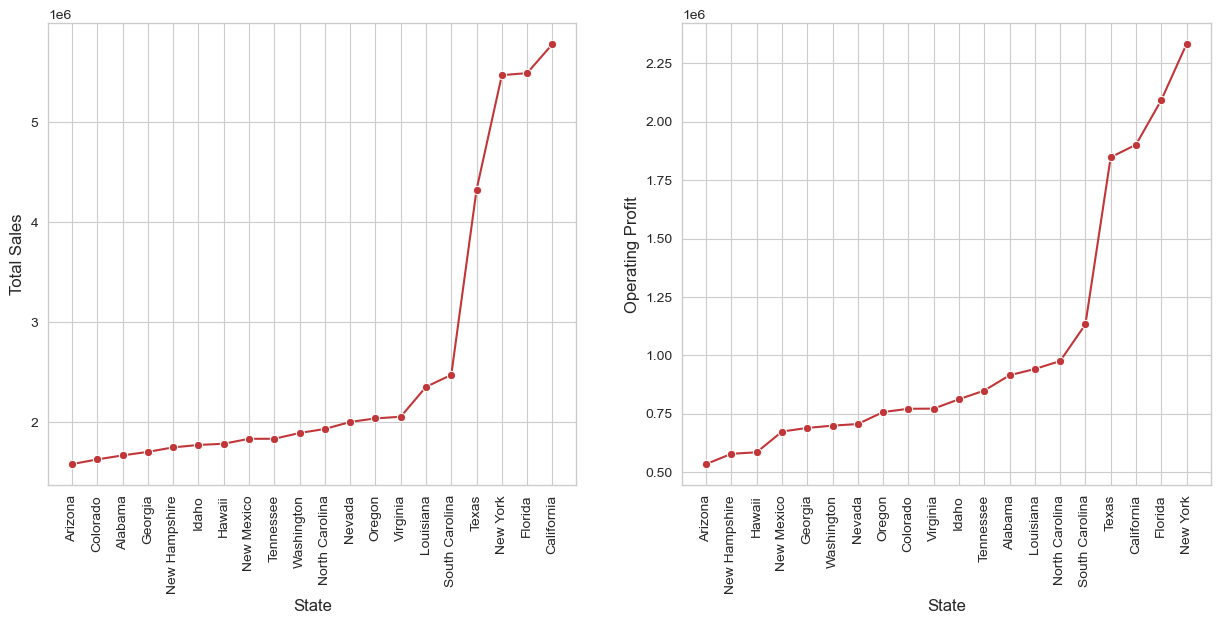

In [75]:

data2 =data.groupby('State')[['Total Sales' ,"Operating Profit" ]].sum().reset_index().sort_values(by = 'Total Sales', ascending = False)[:20]


plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
Tot =data2.groupby("State")['Total Sales'].sum().reset_index().sort_values(by = 'Total Sales')
sns.lineplot(data= Tot , x="State" ,y="Total Sales" ,marker="o" )
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
Prof =data2.groupby("State")['Operating Profit'].sum().reset_index().\
sort_values(by = 'Operating Profit')
sns.lineplot(data= Prof , x="State" ,y="Operating Profit" ,marker="o" )
plt.xticks(rotation = 90)
plt.show()


# What is The Top 10 `City` have `Profit` and `Total Sales` ?


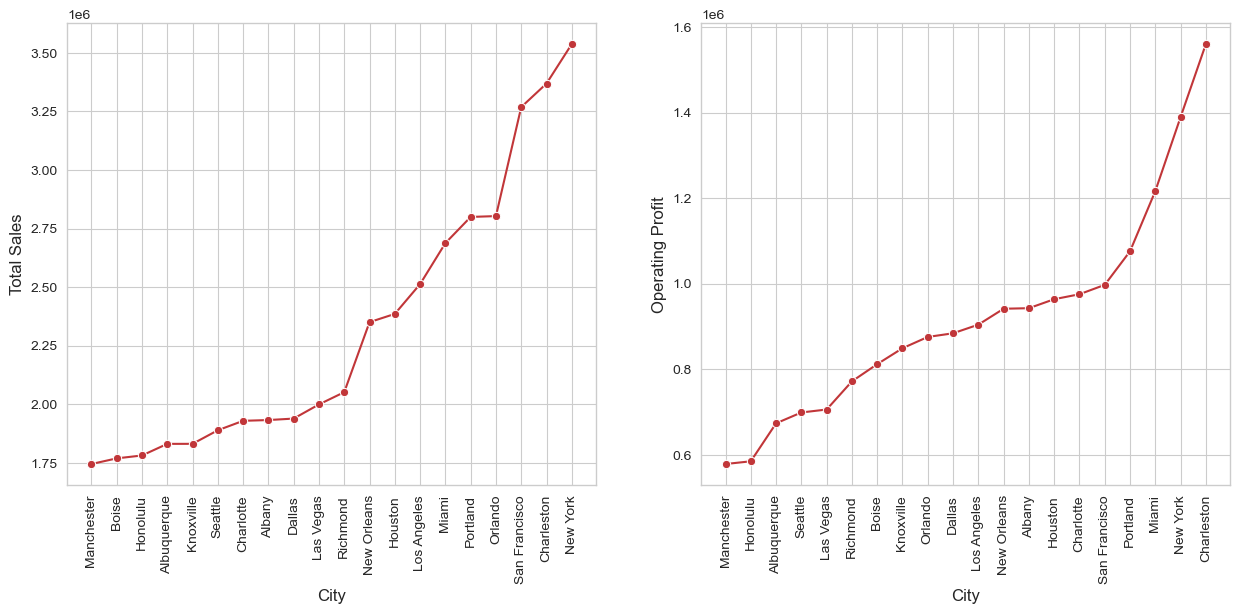

In [76]:
data2 =data.groupby('City')[['Total Sales' ,"Operating Profit" ]].sum().reset_index().sort_values(by = 'Total Sales', ascending = False)[:20]


plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
Tot =data2.groupby("City")['Total Sales'].sum().reset_index().sort_values(by = 'Total Sales')
sns.lineplot(data= Tot , x="City" ,y="Total Sales" ,marker="o" )
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
Prof =data2.groupby("City")['Operating Profit'].sum().reset_index().\
sort_values(by = 'Operating Profit')
sns.lineplot(data= Prof , x="City" ,y="Operating Profit" ,marker="o" )
plt.xticks(rotation = 90)
plt.show()

# Total Sales and Profits Of `2020` is smaller than Total Sales Of `2021` ?

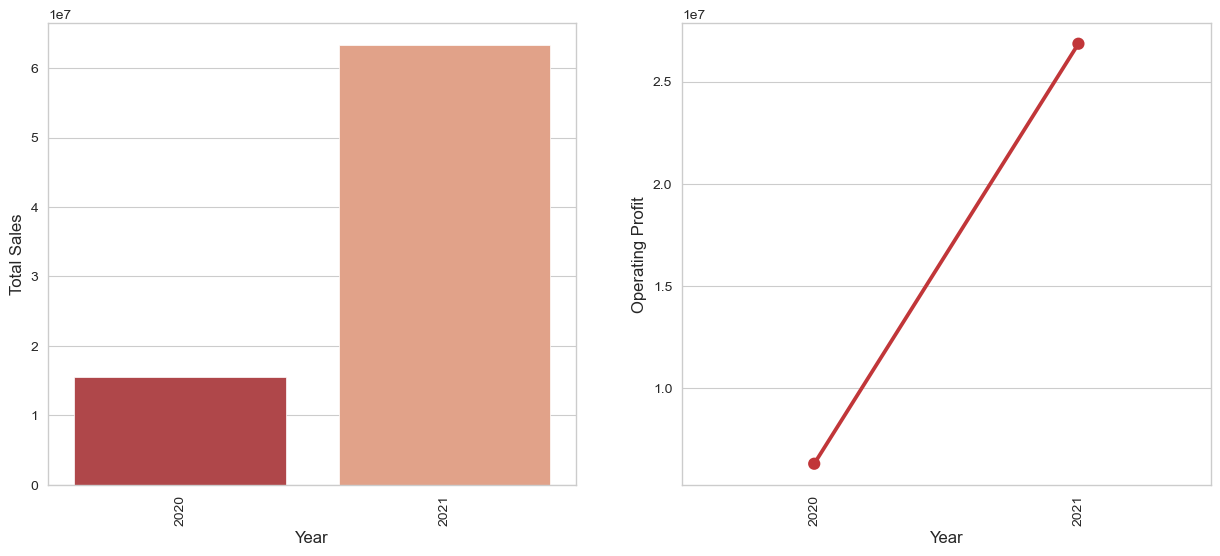

In [77]:
data2 =data.groupby('Year')[['Total Sales' ,"Operating Profit" ]].sum().reset_index().sort_values(by = 'Total Sales', ascending = False)[:20]


plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
Tot =data2.groupby("Year")['Total Sales'].sum().reset_index().sort_values(by = 'Total Sales')
sns.barplot(data= Tot ,x="Year" ,y="Total Sales"  )
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
Prof =data2.groupby("Year")['Operating Profit'].sum().reset_index().\
sort_values(by = 'Operating Profit')
sns.pointplot(data= Prof ,x="Year" ,y="Operating Profit" )
plt.xticks(rotation = 90)
plt.show()

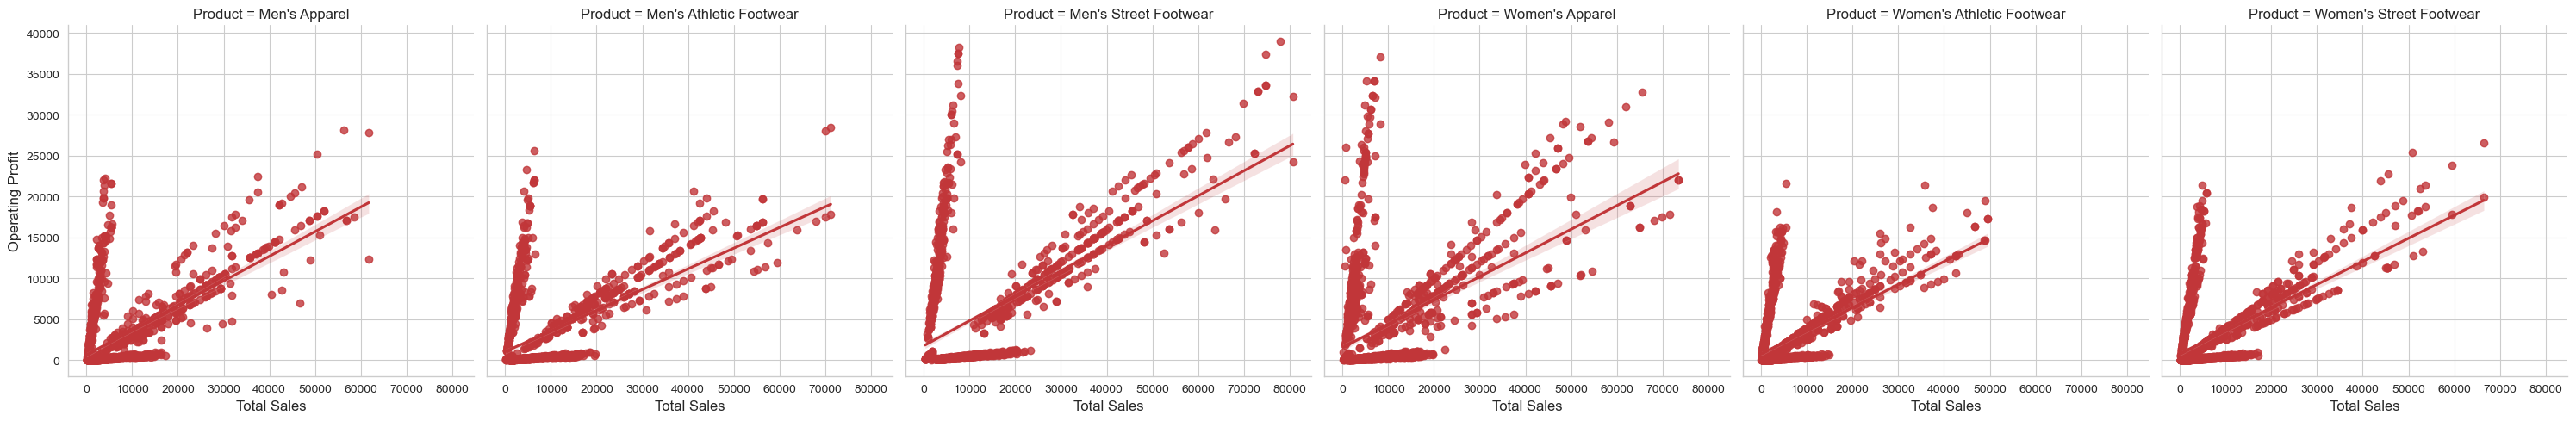

In [78]:
sns.lmplot(data = data , x= "Total Sales" , y = "Operating Profit" ,col="Product")

In [79]:
np.corrcoef(data["Total Sales"] ,data["Operating Profit"])

array([[1.        , 0.55550999],
       [0.55550999, 1.        ]])

`Total sales` and `Profits` of 2021 better than 2020


# `Distribution of profits for each product by city.`

In [80]:
top_10_city = data["City"].value_counts().sort_values(ascending=False)[:10] .index 
data_of_Top10 = data [data["City"].isin(top_10_city)]
data_of_Top10.sample()

,Retailer,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method,Month,Year,Gender,Unit_catogry
7185,Foot Locker,2021-04-06,Southeast,South Carolina,Charleston,Men's Athletic Footwear,35,675,23625.0,8269.0,Online,4,2021,Male,1000+


In [81]:
pd.crosstab(data_of_Top10["City"] ,data_of_Top10.Product )

Product,Men's Apparel,Men's Athletic Footwear,Men's Street Footwear,Women's Apparel,Women's Athletic Footwear,Women's Street Footwear
City,,,,,,
Atlanta,36,36,36,36,36,36
Birmingham,36,36,36,36,36,36
Charleston,48,48,48,48,48,48
Jackson,36,36,36,36,36,36
Knoxville,36,36,36,36,36,36
Little Rock,36,36,36,36,36,36
New York,36,36,36,36,36,36
Oklahoma City,36,36,36,36,36,36
Portland,60,60,60,60,60,60


In [82]:
Print =data_of_Top10.pivot_table( index= data_of_Top10["City"],
                          columns= data_of_Top10.Product  ,
                          aggfunc= {"Operating Profit" :"sum"} 
                 )

Print


Operating Profit                                                \
Product           Men's Apparel Men's Athletic Footwear Men's Street Footwear   
City                                                                            
Atlanta                 86277.0                145021.0              166546.0   
Birmingham              94798.0                155364.0              140907.0   
Charleston             235446.0                222213.0              411021.0   
Jackson                 89029.0                 82826.0              154939.0   
Knoxville               87232.0                145014.0              132640.0   
Little Rock             70550.0                 65876.0              132706.0   
New York               207983.0                193250.0              413502.0   
Oklahoma City           55847.0                 55296.0              117267.0   
Portland               133806.0                198264.0              253717.0   
Salt Lake City          51531.0                 54050.0              101128.0   

                                                          \
Product        Women's Apparel Women's Athletic Footwear   
City                                                       
Atlanta                99626.0                   92113.0   
Birmingham            238168.0                  131658.0   
Charleston            385545.0                  157603.0   
Jackson               162311.0                   73658.0   
Knoxville             222824.0                  122682.0   
Little Rock           108685.0                   56186.0   
New York              198191.0                  186568.0   
Oklahoma City          91514.0                   44028.0   
Portland              197750.0                  121859.0   
Salt Lake City        102255.0                   36231.0   

                                        
Product        Women's Street Footwear  
City                                    
Atlanta                        99753.0  
Birmingham                    153877.0  
Charleston                    148903.0  
Jackson                        74150.0  
Knoxville                     138977.0  
Little Rock                    57572.0  
New York                      190513.0  
Oklahoma City                  46711.0  
Portland                      170700.0  
Salt Lake City                 42151.0

<Axes: xlabel='City', ylabel='Operating Profit'>

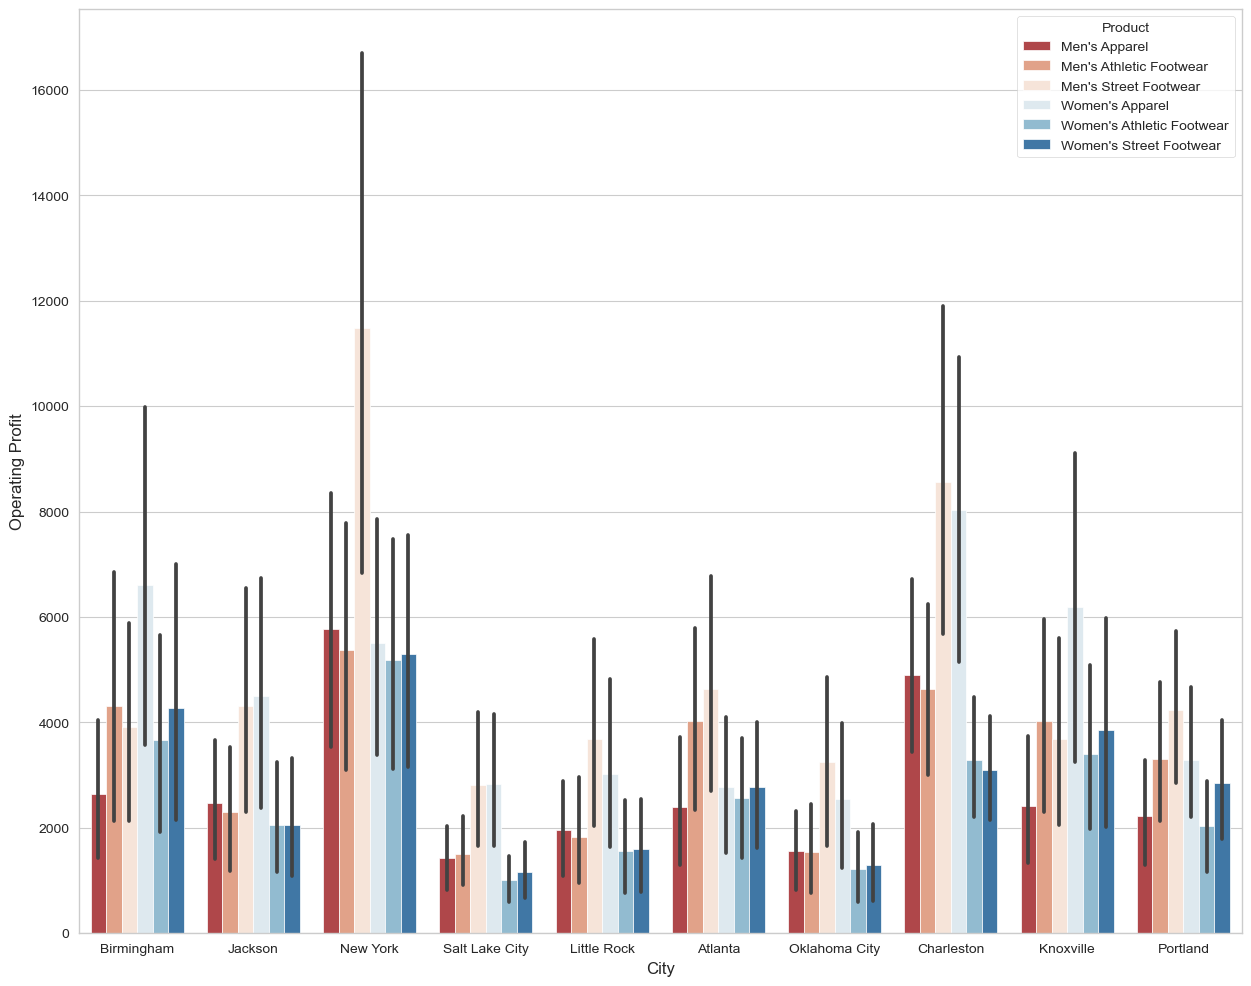

In [83]:
plt.figure(figsize=(15,12))
sns.barplot(data_of_Top10 , x="City" ,y="Operating Profit" ,hue="Product")

The average sales of Men's Street Footwear in America are the most profitable.

# What is the most profitable sales method for each product?







<Axes: xlabel='Sales Method', ylabel='Operating Profit'>

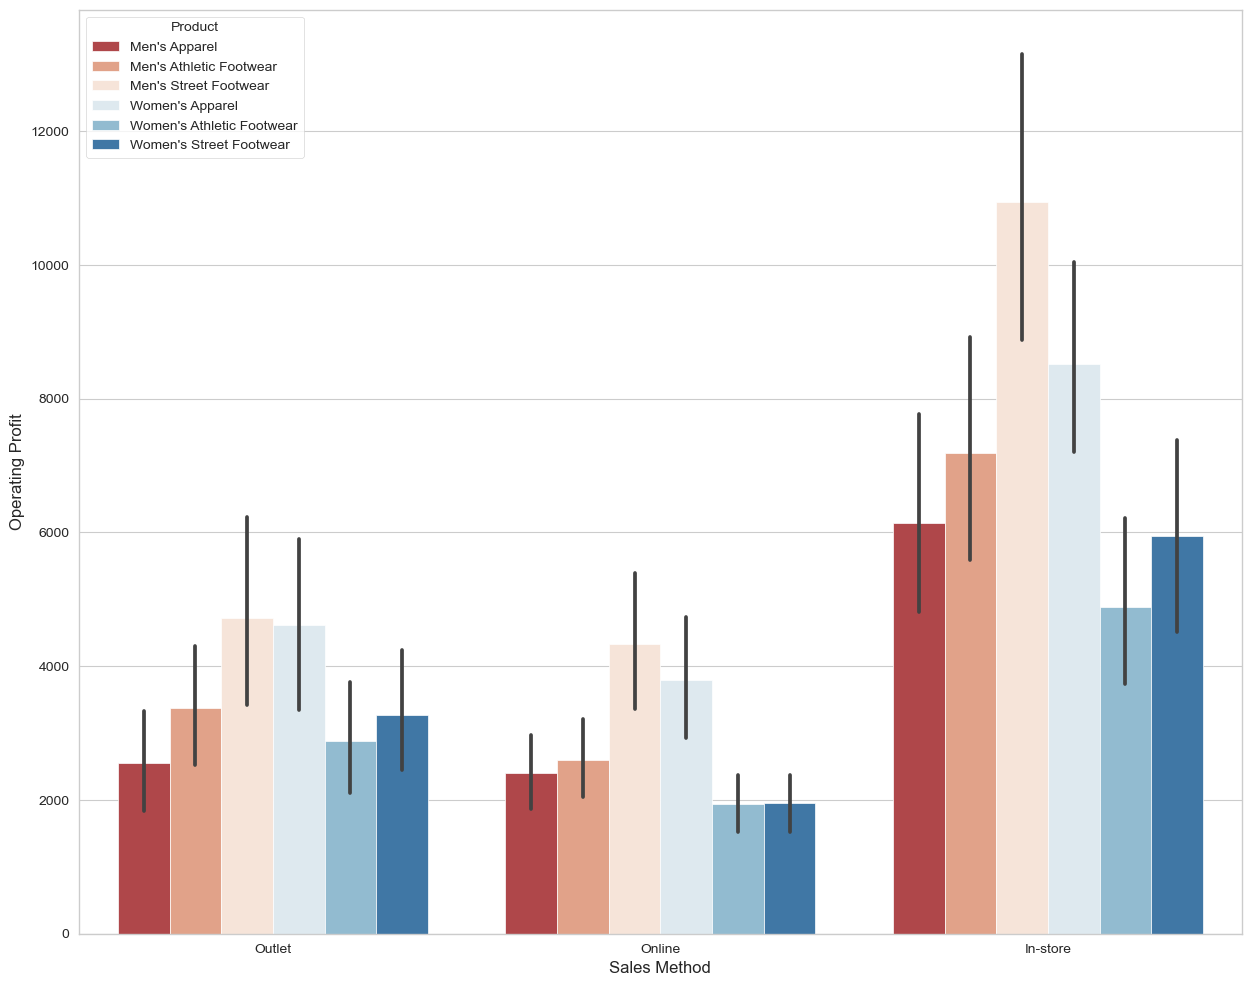

In [84]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,12))
sns.barplot(data_of_Top10 , x="Sales Method" ,y="Operating Profit" ,hue="Product")

# What is the most profitable `Region` for each product?


<Axes: xlabel='Region', ylabel='Operating Profit'>

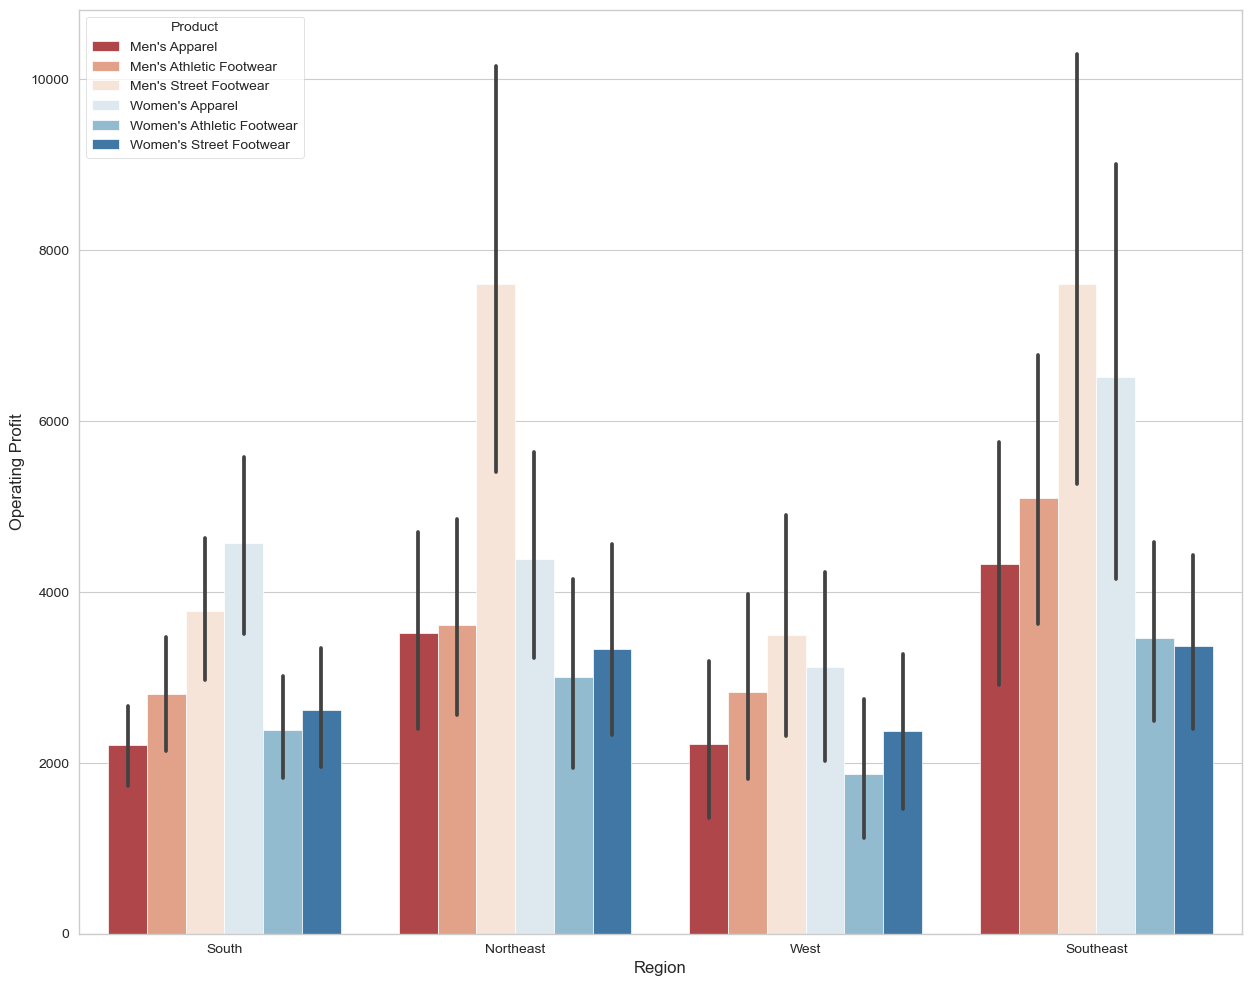

In [85]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,12))
sns.barplot(data_of_Top10 , x="Region" ,y="Operating Profit" ,hue="Product")

# What is the most `Unit_catogry` and What is The  Present  `Total Sales` and `Profits`  ?

In [86]:
tabel =data.groupby("Unit_catogry")[['Total Sales' ,"Operating Profit" ]].sum().reset_index()
tabel["Precentage"] =((tabel['Total Sales'] / tabel['Total Sales'].sum()) * 100).round()
tabel

,Unit_catogry,Total Sales,Operating Profit,Precentage
0,1-50,2785471.0,178331.0,4.0
1,50-150,5137955.0,319234.0,7.0
2,150-250,7051434.0,769626.0,9.0
3,250-500,9461548.0,1326383.0,12.0
4,500-750,12397947.0,3271512.0,16.0
5,750-1000,14616988.0,8748762.0,19.0
6,1000+,27443255.0,18544236.0,35.0


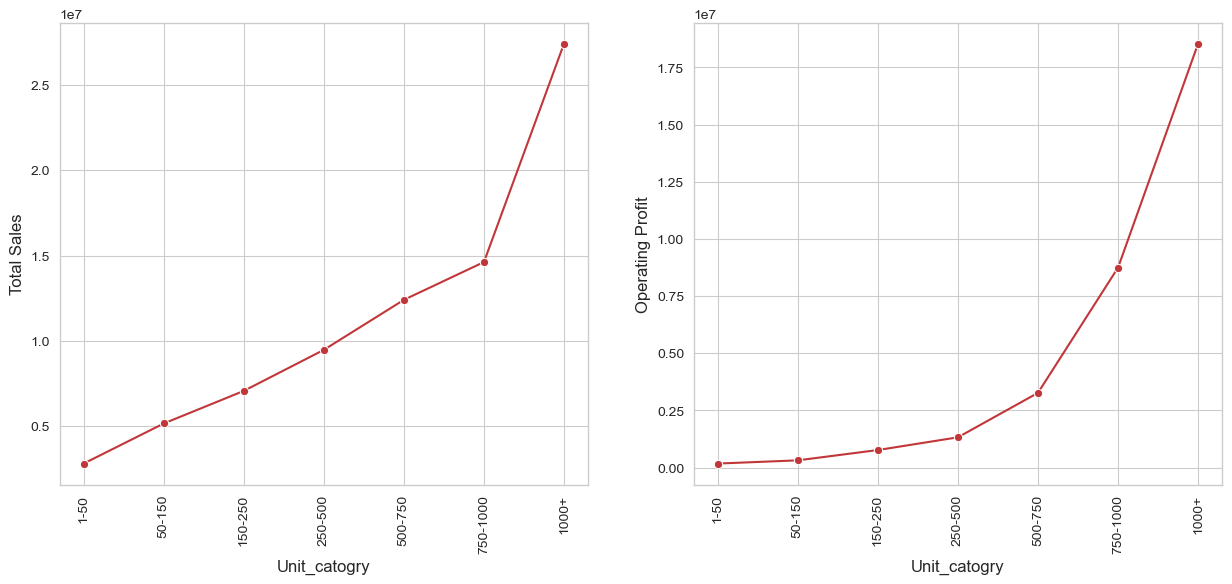

In [87]:

plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
Tot =data.groupby("Unit_catogry")['Total Sales'].sum().reset_index().sort_values(by = 'Total Sales')
sns.lineplot(data= Tot , x="Unit_catogry" ,y="Total Sales" ,marker="o" )
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
Prof =data.groupby("Unit_catogry")['Operating Profit'].sum().reset_index().\
sort_values(by = 'Operating Profit')
sns.lineplot(data= Prof , x="Unit_catogry" ,y="Operating Profit" ,marker="o" )
plt.xticks(rotation = 90)
plt.show()

The Top `Unit_catogry` have Total Sales and Profit `1000+` with 35%

### Distribution of profits by categories for each product.

<Axes: xlabel='Product', ylabel="('Operating Profit', '1-50')">

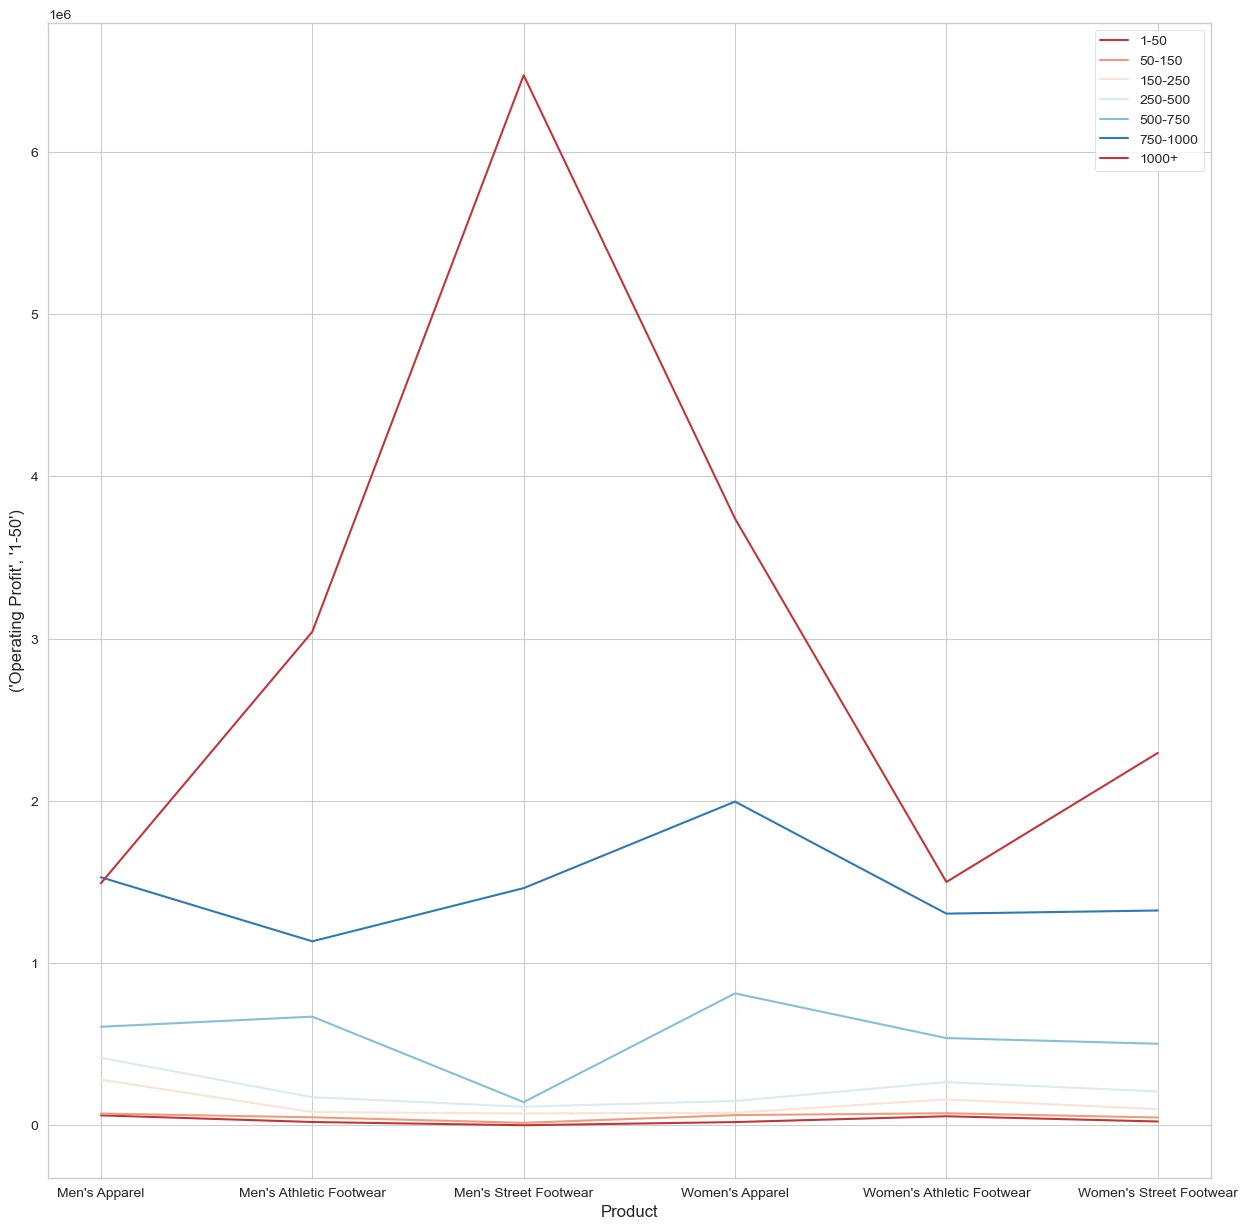

In [88]:
plt.figure(figsize=(15,15))
tabel = data.pivot_table(index="Product" ,columns="Unit_catogry" ,aggfunc={"Operating Profit" :"sum"})
sns.lineplot(data=tabel , x= tabel.index ,y =('Operating Profit','1-50'    ) , markers="o"  ,label ='1-50'  )
sns.lineplot(data=tabel , x= tabel.index ,y =('Operating Profit', '50-150' ) , markers="*" ,label = '50-150' )
sns.lineplot(data=tabel , x= tabel.index ,y =('Operating Profit','150-250' ) , markers="-" ,label ='150-250' )
sns.lineplot(data=tabel , x= tabel.index ,y =('Operating Profit','250-500') , markers="o",label ='250-500'  )
sns.lineplot(data=tabel , x= tabel.index ,y =('Operating Profit','500-750' ) , markers="o" ,label ='500-750' )
sns.lineplot(data=tabel , x= tabel.index ,y =('Operating Profit','750-1000') , markers="o" ,label ='750-1000')
sns.lineplot(data=tabel , x= tabel.index ,y =('Operating Profit','1000+')   , markers="o"  ,label ='1000+')   

## Distribution of profits on a monthly basis.

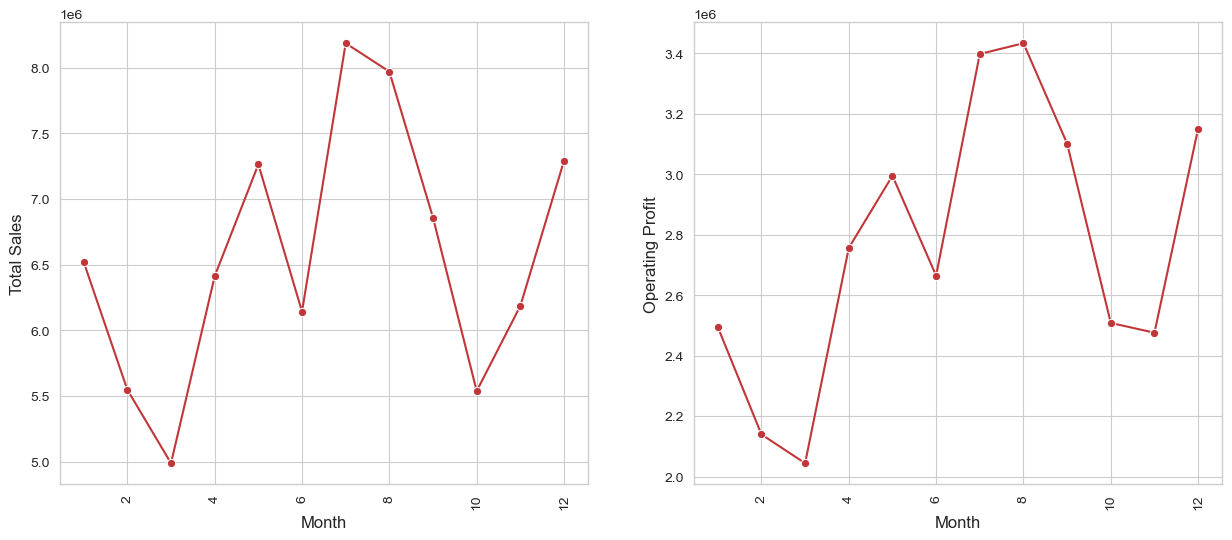

In [89]:
data2 =data.groupby('Month')[['Total Sales' ,"Operating Profit" ]].sum().reset_index().sort_values(by = 'Total Sales', ascending = False)[:20]


plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
Tot =data2.groupby("Month")['Total Sales'].sum().reset_index().sort_values(by = 'Total Sales')
sns.lineplot(data= Tot , x="Month" ,y="Total Sales" ,marker="o" )
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
Prof =data2.groupby("Month")['Operating Profit'].sum().reset_index().\
sort_values(by = 'Operating Profit')
sns.lineplot(data= Prof , x="Month" ,y="Operating Profit" ,marker="o" )
plt.xticks(rotation = 90)
plt.show()

## Distribution of `profits` and `Total Sales` for each product every month

In [90]:
data.pivot_table(index= "Month",columns="Product" ,aggfunc={"Total Sales" :"sum"})

Total Sales                                                \
Product Men's Apparel Men's Athletic Footwear Men's Street Footwear   
Month                                                                 
1            996736.0               1208972.0             1332804.0   
2            893148.0               1034877.0             1316663.0   
3            585631.0                965065.0             1017122.0   
4            787171.0               1139981.0             1483485.0   
5           1092646.0               1187860.0             1562370.0   
6            949631.0                973031.0             1400888.0   
7           1143216.0               1469572.0             1765364.0   
8           1058656.0               1667885.0             1821634.0   
9           1021270.0               1090527.0             1724623.0   
10           798437.0                959401.0             1189805.0   
11          1036344.0                844213.0             1382639.0   
12           954997.0               1272404.0             1795504.0   

                                                                           
Product Women's Apparel Women's Athletic Footwear Women's Street Footwear  
Month                                                                      
1             1042201.0                  790118.0               1149252.0  
2              744681.0                  687867.0                870120.0  
3             1080271.0                  599665.0                740120.0  
4             1467341.0                  723172.0                810157.0  
5             1549009.0                  851821.0               1019037.0  
6             1226928.0                  704413.0                886775.0  
7             1722348.0                  921684.0               1162650.0  
8             1448856.0                  843724.0               1127729.0  
9             1128026.0                  818429.0               1073388.0  
10            1017583.0                  733018.0                839086.0  
11            1242721.0                  854642.0                825235.0  
12            1510546.0                  823473.0                933940.0

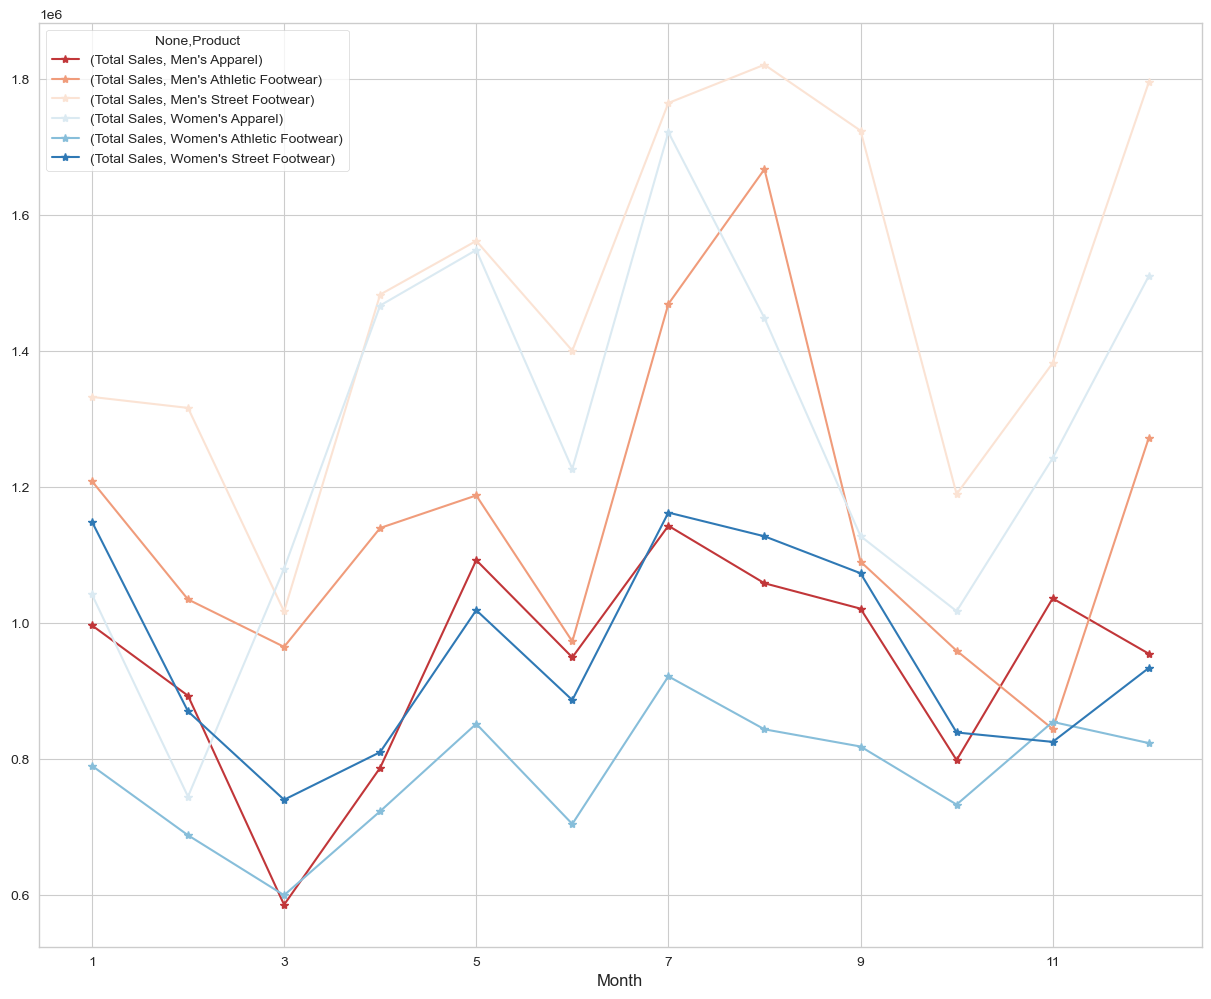

In [91]:
data.pivot_table(index= "Month",columns="Product" ,aggfunc={"Total Sales" :"sum"}).plot(marker="*" ,figsize= (15,12))

plt.show()


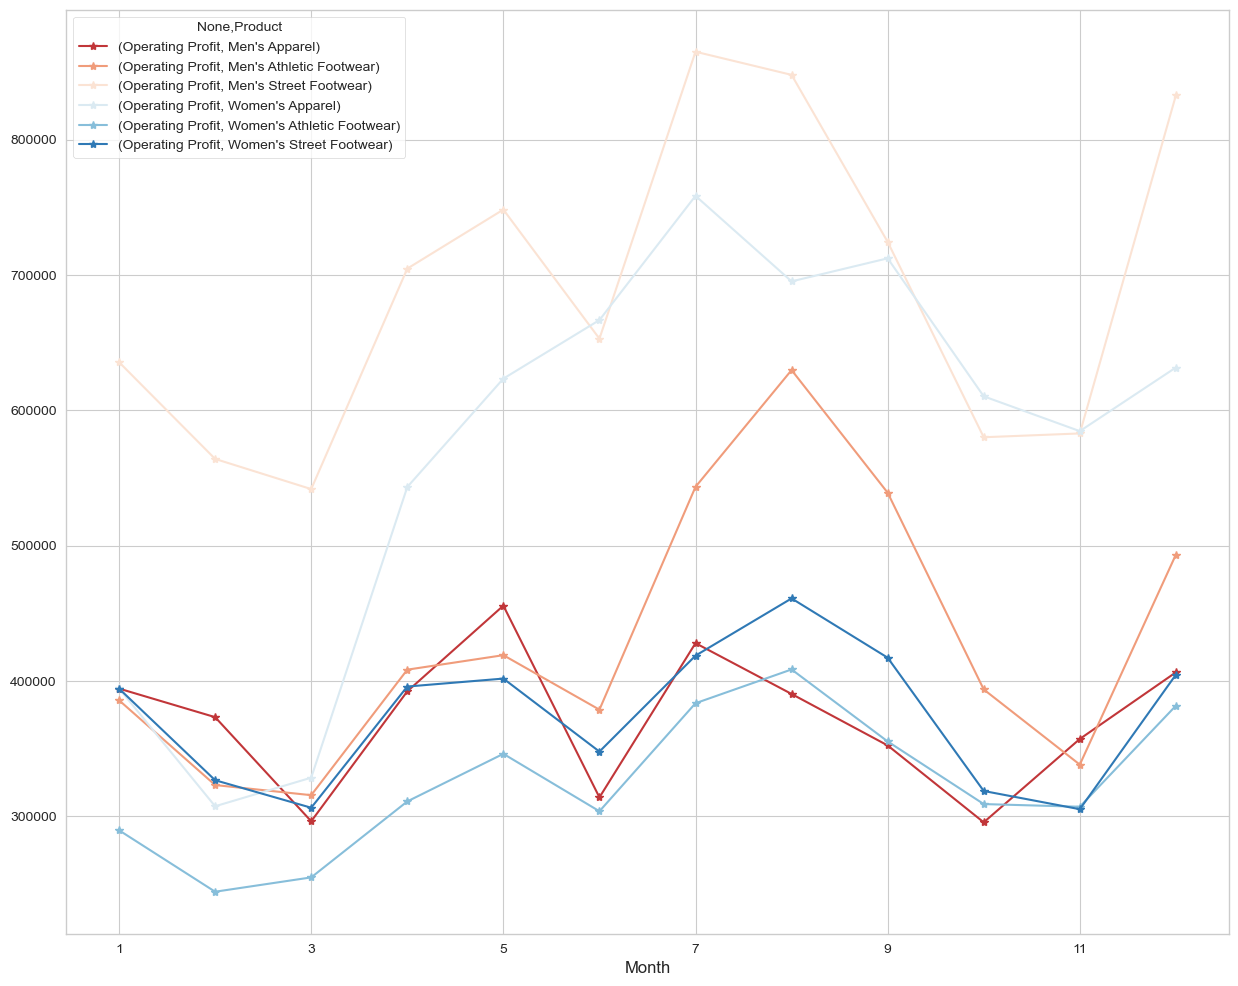

In [92]:
data.pivot_table(index= "Month",columns="Product" ,aggfunc={"Operating Profit" :"sum"}).plot(marker="*" ,figsize= (15,12))

plt.show()


In [93]:
data.sample()

,Retailer,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method,Month,Year,Gender,Unit_catogry
3415,Amazon,2021-03-20,West,Alaska,Anchorage,Women's Athletic Footwear,5,125,625.0,1563.0,Outlet,3,2021,Female,150-250
